In [ ]:
!pip install pandas==1.2.4

     |████████████████████████████████| 9.9 MB 5.1 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


# import

In [ ]:
!pip install scanpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

     |████████████████████████████████| 2.0 MB 5.2 MB/s 
     |████████████████████████████████| 91 kB 9.0 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 42.6 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=0b2a9b3d444ee5fbb8950c421c078e50f0b14a1f7937ec2d6f5bdc4c6ec02112
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=477a2fc59c49ddefd4d9fcc2ba19b14701f33fddc8ea2342f42178aecd4d4ec9
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for sinfo: filename=sinfo-0.3.4-py3-none-any.whl size=7899 sha256=2ded0e4d417ecd1e3dcddf6ef2b630d608aeffa6520d0c15f4644454c3c5f530
  Stored in directory: /root/.cache/pi

In [ ]:
%%bash
pip install bbknn
pip install leidenalg

  Created wheel for annoy: filename=annoy-1.17.0-cp37-cp37m-linux_x86_64.whl size=391669 sha256=9805cd2115ebcd5a4855a181ff33bd01563ea5dff6b1717a540bdab9acf7fee2
  Stored in directory: /root/.cache/pip/wheels/4f/e8/1e/7cc9ebbfa87a3b9f8ba79408d4d31831d67eea918b679a4c07
Successfully built annoy


In [ ]:
%%bash
cp /content/drive/MyDrive/SL/data/Pan-Cancer.zip /content/
unzip Pan-Cancer.zip

Archive:  Pan-Cancer.zip
   creating: Pan-Cancer/
  inflating: Pan-Cancer/ESCA.h5ad    
  inflating: Pan-Cancer/KIDNEY.h5ad  
  inflating: Pan-Cancer/LYM.h5ad     
  inflating: Pan-Cancer/MYE.h5ad     
  inflating: Pan-Cancer/OV-FTC.h5ad  
  inflating: Pan-Cancer/PAAD.h5ad    
  inflating: Pan-Cancer/THCA.h5ad    
  inflating: Pan-Cancer/UCEC.h5ad    
  inflating: Pan-Cancer/cDC2.h5ad    


In [ ]:
!git clone https://github.com/bioinfo-ibms-pumc/SCSA.git

Cloning into 'SCSA'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 154 (delta 17), reused 0 (delta 0), pack-reused 123
Receiving objects: 100% (154/154), 21.19 MiB | 21.37 MiB/s, done.
Resolving deltas: 100% (86/86), done.


# LYM

In [ ]:
import anndata
adata=anndata.read_h5ad("/content/Pan-Cancer/LYM.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.leiden(adata)
len(list(set(adata.obs.leiden)))

extracting highly variable genes
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)


9

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("lym_rank.csv")
dat.to_csv("/content/drive/MyDrive/SL/data/lym_rank.csv")

ranking genes
    finished (0:00:01)


In [ ]:
%%bash
python '/content/SCSA/SCSA.py' -d '/content/SCSA/whole.db' -i lym_rank.csv -s scanpy -E -f 1.5 -p 0.01 -o '/content/lym_result.txt' -m txt 

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(Gensymbol=True, MarkerDB=None, celltype='normal', cluster='all', db='/content/SCSA/whole.db', foldchange=1.5, input='lym_rank.csv', list_tissue=False, noprint=False, norefdb=False, outfmt='txt', output='/content/lym_result.txt', pvalue=0.01, source='scanpy', species='Human', target='cellmarker', tissue='All', weight=100.0)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 45409
############################## Cluster 0 ##############################

Cell Num: 162
Gene Num: 399
Not Zero: 1215
Cluster 0 Gene number: 505
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                    Monocyte           6.0029    1.3  
------------------------------------------------------------
              (Natural killer cell)    (4.6816)
---------------------------------------------

In [ ]:
cmdt=pd.read_csv('lym_result.txt',sep='\t')

In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(adata.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['Monocyte' 6.002872386783921 0]]
[['Monocyte' 7.290373058656892 1]]
[['Macrophage' 5.93172637935419 2]]
[['Microglial cell' 5.722238420673882 3]]
[['Myeloid dendritic cell' 6.683704646870444 4]]
[['Myeloid dendritic cell' 6.794611563582143 5]]
[['Macrophage' 4.4194516429058375 6]]
[['Astrocyte' 7.123879775778318 7]]
[['Plasmacytoid dendritic cell' 10.721546751527963 8]]


In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(adata.obs.leiden))))]
celltype[4]='Endothelial cell'

In [ ]:
celltype=celltype[:]
ty=list(set(celltype))
k=pd.DataFrame(index=ty)
for i in range(len(celltype)):
  test=cmdt.loc[cmdt['Cluster']==i]
  test=test.set_index(test.columns[0])
  ty1=list(set(ty).intersection(test.index.tolist()))
  k[str(i)]=test.loc[ty1]['Z-score']
k.fillna(0, inplace=True)
k.head()

0         1  ...         7          8
Myeloid dendritic cell       0.723814  0.549370  ...  1.328767   0.294786
Plasmacytoid dendritic cell -0.320270  0.008928  ...  0.471418  10.721547
Microglial cell              2.361052  1.383818  ...  2.726805   1.016083
Macrophage                   3.491935  3.459640  ...  4.144156  -0.147642
Endothelial cell             3.440165  0.276577  ...  1.771148   1.546847

[5 rows x 9 columns]

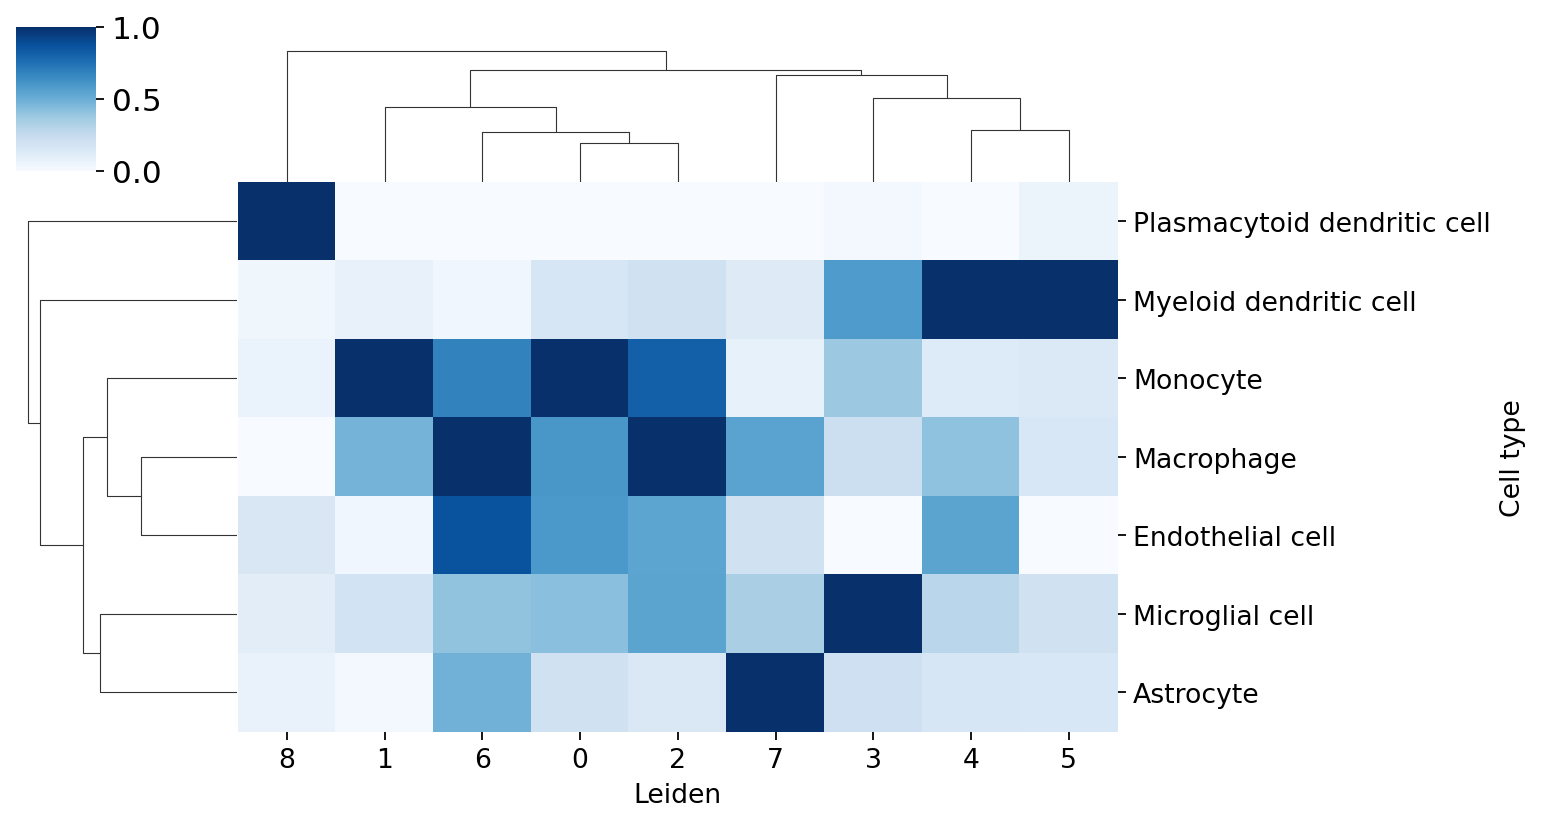

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a = sns.clustermap(k,standard_scale=1,cmap = "Blues",figsize=(10,5))
#设置聚类热图的横纵坐标标签大小
a.ax_heatmap.yaxis.set_tick_params(labelsize=12)
a.ax_heatmap.xaxis.set_tick_params(labelsize=12)
# option 1
#a.ax_heatmap.set(xlabel='Leiden',ylabel='Cell type',font={'size':12})
a.ax_heatmap.set_xlabel("Leiden", fontsize = 12)
a.ax_heatmap.set_ylabel("Cell type", fontsize = 12)
#a.ax_heatmap.set_title("Plot", fontsize = 20)
plt.savefig("fig_cell_type_lym.png",dpi=300,bbox_inches = 'tight')

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['Monocyte',
 'Monocyte-1',
 'Macrophage',
 'Microglial cell',
 'Endothelial cell',
 'Myeloid dendritic cell',
 'Macrophage-1',
 'Astrocyte',
 'Plasmacytoid dendritic cell']

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing UMAP
    finished (0:00:02)


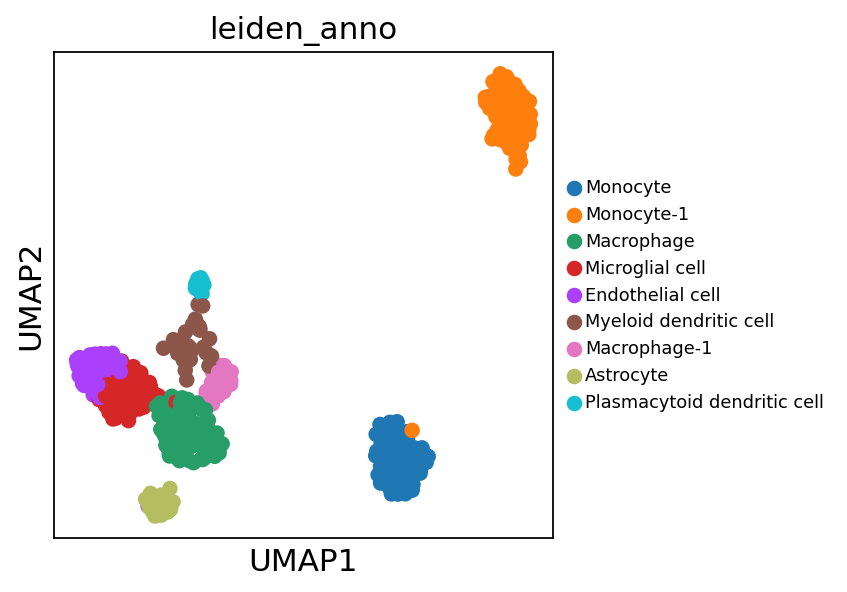

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,metric="cosine")
sc.tl.umap(adata,random_state=41822099)
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=8,)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9957852  0.9857038  0.9786761  0.9654271  0.9580577
     0.9393539  0.92698425 0.8837245  0.8465618  0.84263057 0.8386317
     0.83062416 0.81157815 0.8049716 ]
    finished (0:00:00)
computing neighbors
    finished (0:00:00)
running PAGA
    finished (0:00:00)


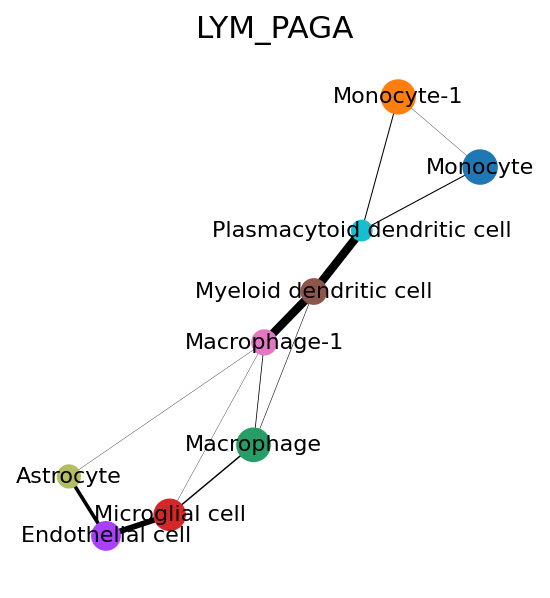

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43,save='lym_trajectery.png',title='LYM_PAGA')

running PAGA
    finished (0:00:00)


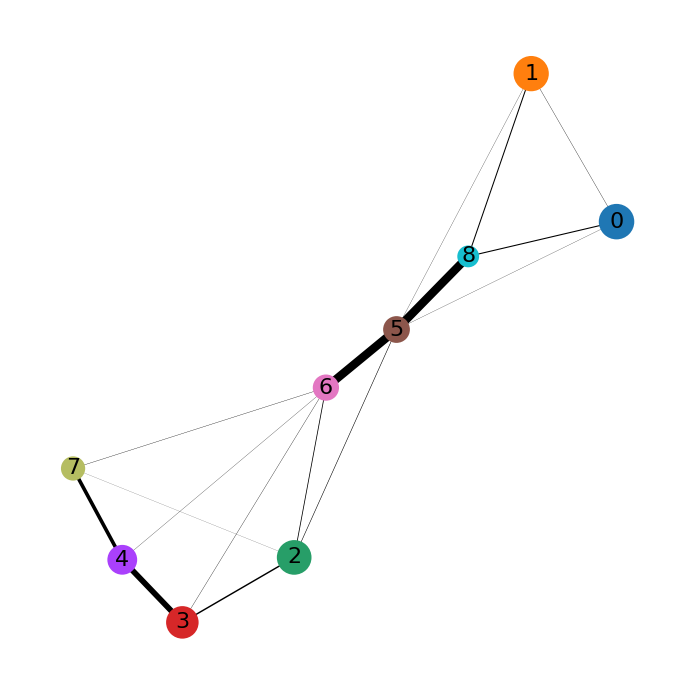

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, threshold=0.01, show=False,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43)

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == 'Endothelial cell')[0]
sc.tl.dpt(adata,)

drawing single-cell graph using layout 'fa'
    finished (0:00:03)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


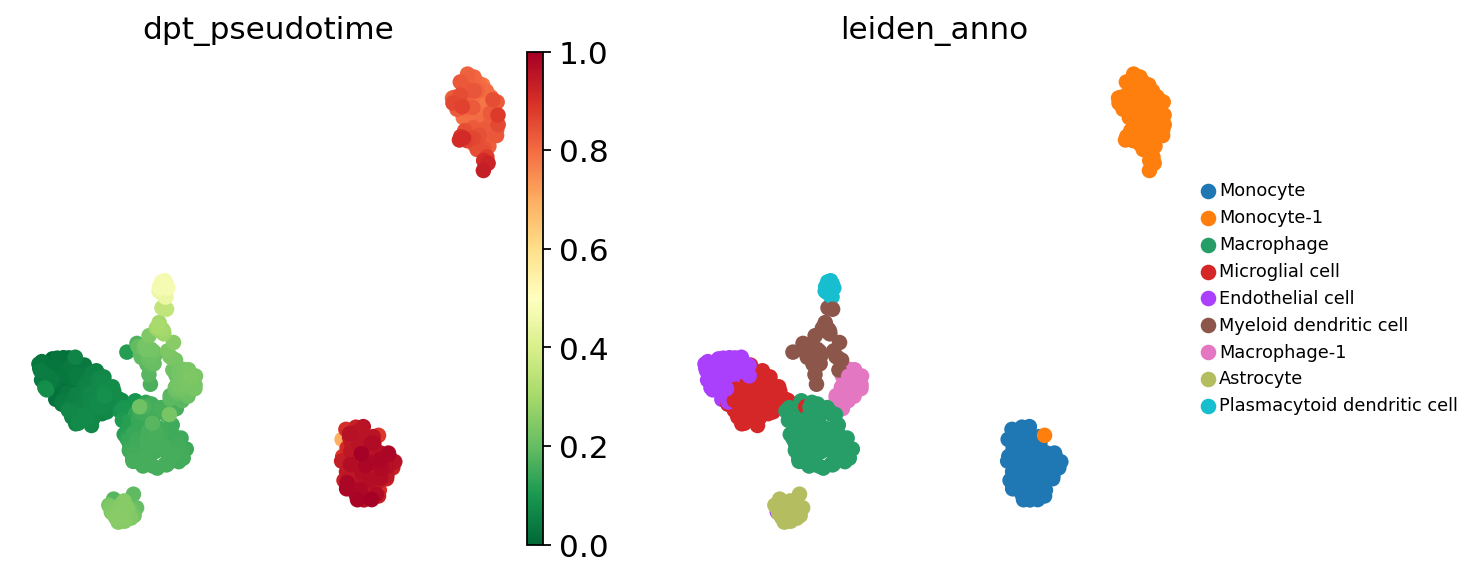

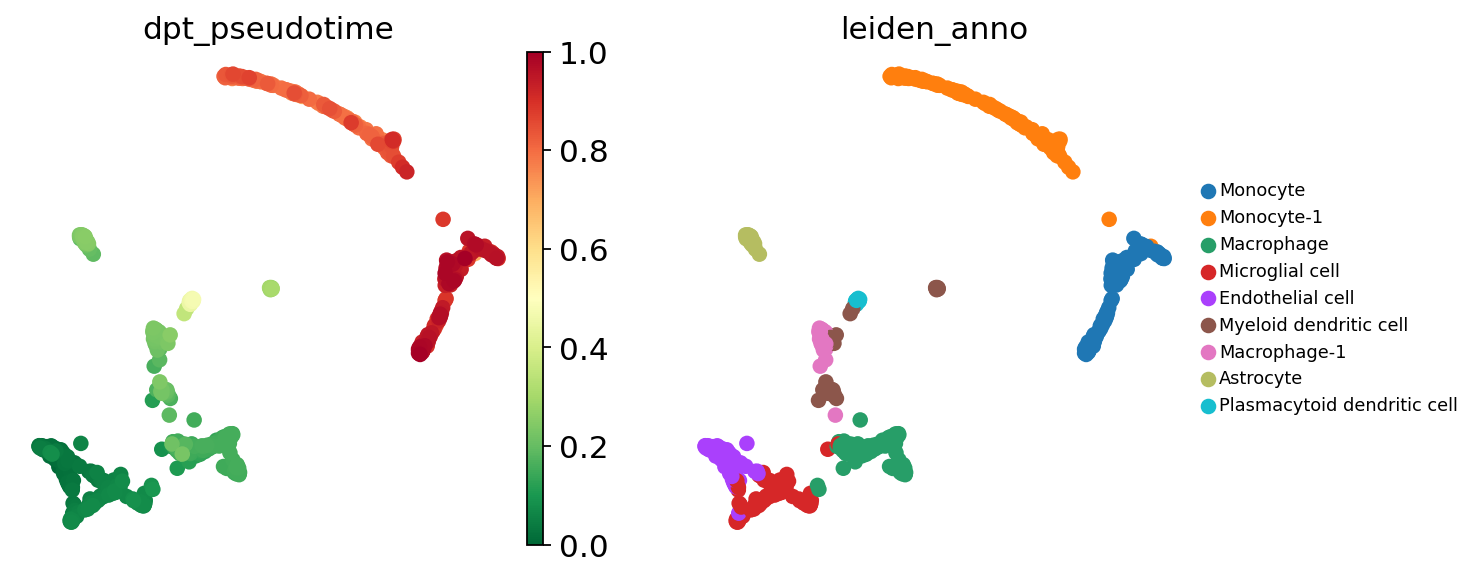

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='lym_umap.png')
sc.pl.draw_graph(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='lym_dpt.png')

In [ ]:
import json
path={
      'Dendritic cell':[4,6,5,8],
      'Macrophage':[4,3,2],
      'Monocyte':[4,6,5,0,1],
      'Microgial cell':[4,3]
}
with open("/content/drive/MyDrive/SL/data/dpt/lym_dpt_json.json","w") as f:
  json.dump(path,f)

In [ ]:
newdata=anndata.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, dtype='float32')
newdata.write("/content/drive/MyDrive/SL/data/dpt/lym_dpt.h5ad", compression="gzip")

# MYE

In [ ]:
import anndata
adata=anndata.read_h5ad("/content/Pan-Cancer/MYE.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.leiden(adata)
len(list(set(adata.obs.leiden)))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


17

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("mye_rank.csv")
dat.to_csv("/content/drive/MyDrive/SL/data/mye_rank.csv")

ranking genes


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


    finished (0:00:18)


In [ ]:
%%bash
python '/content/SCSA/SCSA.py' -d '/content/SCSA/whole.db' -i mye_rank.csv -s scanpy -E -f 1.5 -p 0.01 -o '/content/mye_result.txt' -m txt

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(Gensymbol=True, MarkerDB=None, celltype='normal', cluster='all', db='/content/SCSA/whole.db', foldchange=1.5, input='mye_rank.csv', list_tissue=False, noprint=False, norefdb=False, outfmt='txt', output='/content/mye_result.txt', pvalue=0.01, source='scanpy', species='Human', target='cellmarker', tissue='All', weight=100.0)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 45409
############################## Cluster 0 ##############################

Cell Num: 135
Gene Num: 69
Not Zero: 387
Cluster 0 Gene number: 92
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                    Monocyte           5.6643    1.2  
------------------------------------------------------------
              (Natural killer cell)    (4.8003)
------------------------------------------------

In [ ]:
cmdt=pd.read_csv('mye_result.txt',sep='\t')

In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(adata.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['Monocyte' 5.664347949997782 0]]
[['Astrocyte' 3.7471134708085554 1]]
[['Monocyte' 5.724240590370045 2]]
[['Neutrophil' 2.848616844116908 3]]
[['B cell' 5.989781220923355 4]]
[['Neutrophil' 3.1373592421002177 5]]
[['Monocyte' 5.748538527920252 6]]
[['Endothelial cell' 6.4365458790228 7]]
[['Natural killer cell' 3.1903773382665217 8]]
[['Natural killer cell' 4.691917929652034 9]]
[['Neutrophil' 6.786041630340906 10]]
[['Monocyte' 3.684943716975015 11]]
[['Myeloid dendritic cell' 7.287776255363069 12]]
[['T helper1 (Th1) cell' 4.525306254319946 13]]
[['Monocyte' 5.452077409028232 14]]
[['Plasmacytoid dendritic cell' 11.231657372743344 15]]
[['Plasma cell' 6.329215788862763 16]]


In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(adata.obs.leiden))))]
#celltype[15]='Mesenchymal stem cell'

In [ ]:
celltype=celltype[:]
ty=list(set(celltype))
k=pd.DataFrame(index=ty)
for i in range(len(celltype)):
  test=cmdt.loc[cmdt['Cluster']==i]
  test=test.set_index(test.columns[0])
  ty1=list(set(ty).intersection(test.index.tolist()))
  k[str(i)]=test.loc[ty1]['Z-score']
k.fillna(0, inplace=True)
k.head()

0    1  ...         15        16
Myeloid dendritic cell       0.000000  0.0  ...   0.109683  0.000000
Plasmacytoid dendritic cell  1.192557  0.0  ...  11.231657  1.261397
T helper1 (Th1) cell         0.000000  0.0  ...   1.911202  0.000000
Neutrophil                   4.003801  0.0  ...  -0.231268  0.967736
B cell                       1.185531  0.0  ...   3.646819  3.908071

[5 rows x 17 columns]

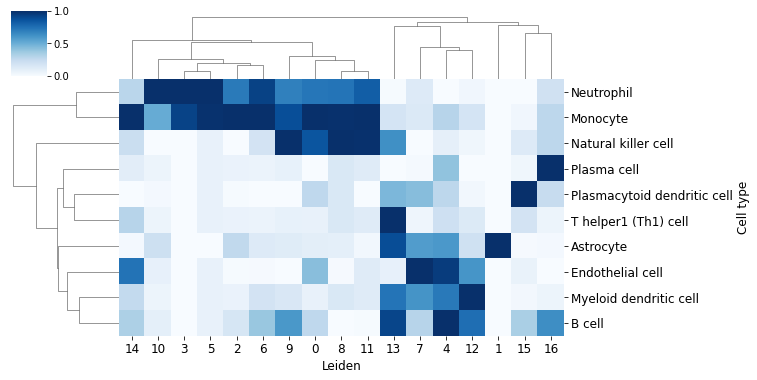

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a = sns.clustermap(k,standard_scale=1,cmap = "Blues",figsize=(10,5))
#设置聚类热图的横纵坐标标签大小
a.ax_heatmap.yaxis.set_tick_params(labelsize=12)
a.ax_heatmap.xaxis.set_tick_params(labelsize=12)
# option 1
#a.ax_heatmap.set(xlabel='Leiden',ylabel='Cell type',font={'size':12})
a.ax_heatmap.set_xlabel("Leiden", fontsize = 12)
a.ax_heatmap.set_ylabel("Cell type", fontsize = 12)
#a.ax_heatmap.set_title("Plot", fontsize = 20)
plt.savefig("fig_cell_type_mye.png",dpi=300,bbox_inches = 'tight')

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['Monocyte',
 'Astrocyte',
 'Monocyte-1',
 'Neutrophil',
 'B cell',
 'Neutrophil-1',
 'Monocyte-2',
 'Endothelial cell',
 'Natural killer cell',
 'Natural killer cell-1',
 'Neutrophil-2',
 'Monocyte-3',
 'Myeloid dendritic cell',
 'T helper1 (Th1) cell',
 'Monocyte-4',
 'Plasmacytoid dendritic cell',
 'Plasma cell']

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:20)
computing UMAP
    finished (0:00:25)


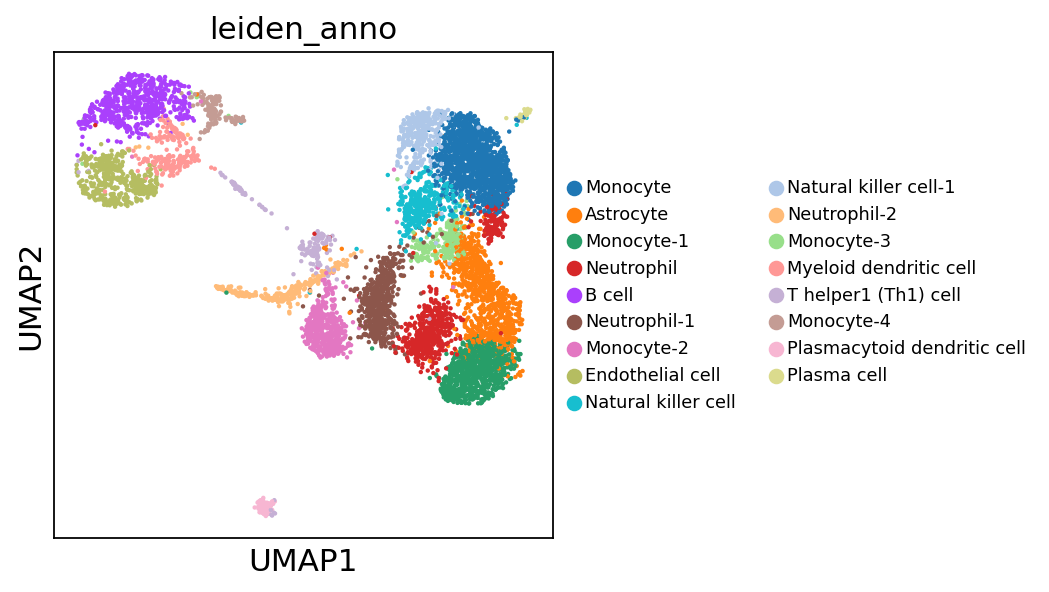

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,metric="cosine")
sc.tl.umap(adata,random_state=41822099)
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=8,)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.99949396 0.9990422  0.998403   0.99810916
     0.9975997  0.99726266 0.9971039  0.9968929  0.9961672  0.9953595
     0.9942433  0.99378103 0.99360216]
    finished (0:00:03)
computing neighbors
    finished (0:00:04)
running PAGA
    finished (0:00:00)


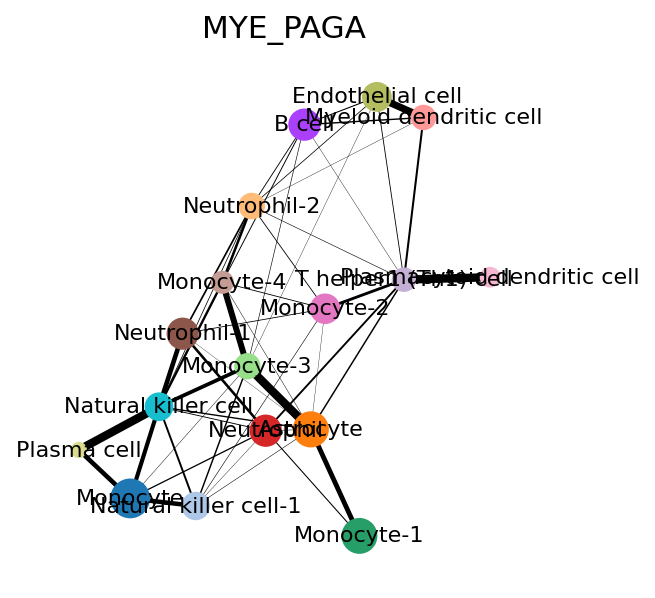

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43,save='_mye_trajectery.png',title='MYE_PAGA')

running PAGA
    finished (0:00:00)


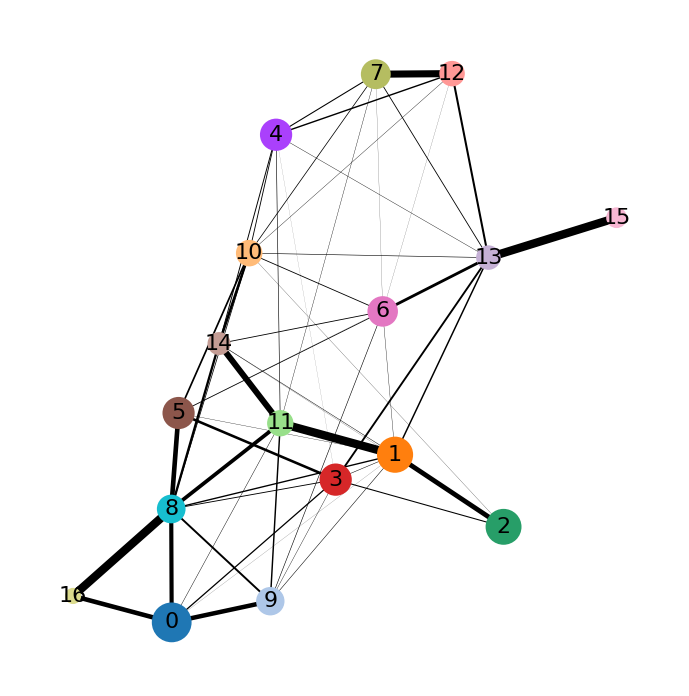

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, threshold=0.01, show=False,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43)

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == 'Endothelial cell')[0]
sc.tl.dpt(adata,)

drawing single-cell graph using layout 'fa'
    finished (0:01:11)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


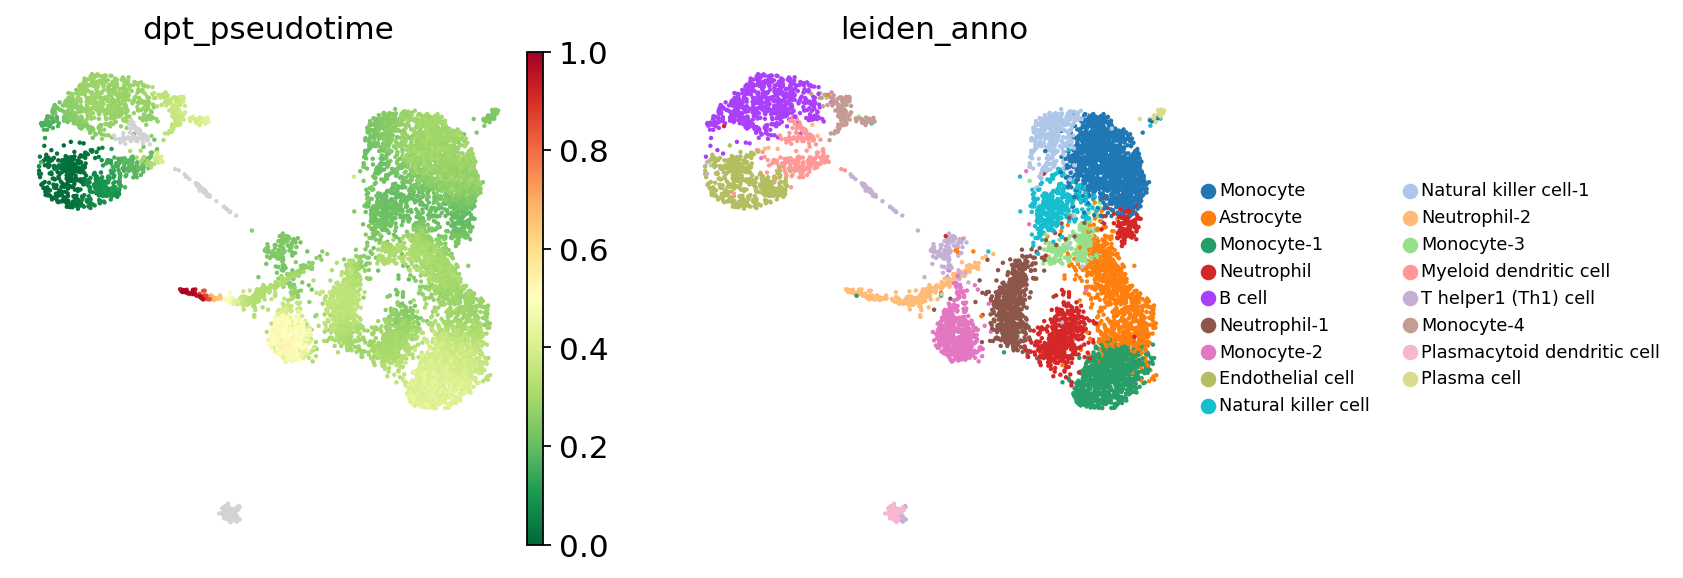

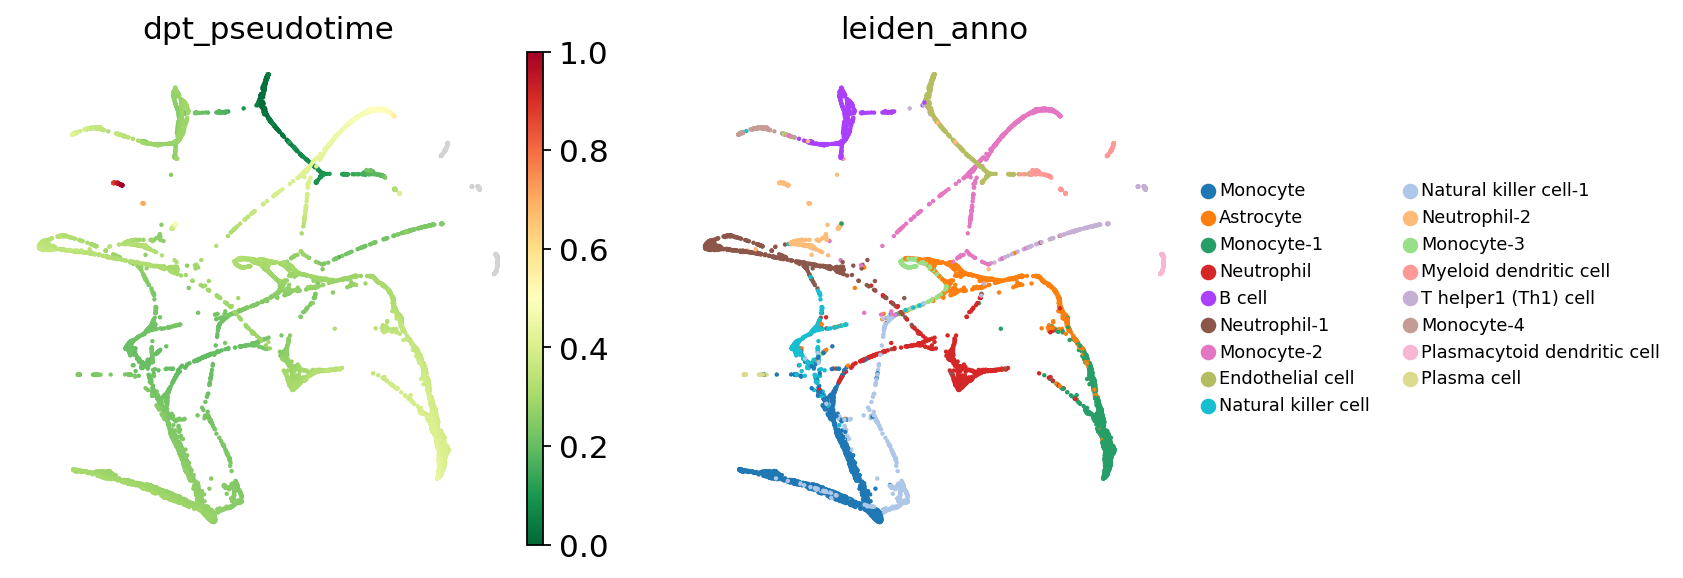

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='_mye_umap.png')
sc.pl.draw_graph(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='_mye_dpt.png')

In [ ]:
import json
path={
      'Dendritic cell':[7,12,13,15],
      'Monocyte':[7,10,14,6,11,0,1,2],
      'Neutrophil':[7,10,5,3],
}
with open("/content/drive/MyDrive/SL/data/dpt/mye_dpt_json.json","w") as f:
  json.dump(path,f)

In [ ]:
newdata=anndata.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, dtype='float32')
newdata.write("/content/drive/MyDrive/SL/data/dpt/mye_dpt.h5ad", compression="gzip")

# OV-FTC

In [ ]:
import anndata
adata=anndata.read_h5ad("/content/Pan-Cancer/OV-FTC.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.leiden(adata)
len(list(set(adata.obs.leiden)))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


11

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("ov-ftc_rank.csv")
dat.to_csv("/content/drive/MyDrive/SL/data/ov-ftc_rank.csv")

ranking genes
    finished (0:00:06)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%%bash
python '/content/SCSA/SCSA.py' -d '/content/SCSA/whole.db' -i ov-ftc_rank.csv -s scanpy -E -f 1.5 -p 0.01 -o '/content/ov-ftc_result.txt' -m txt 

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(Gensymbol=True, MarkerDB=None, celltype='normal', cluster='all', db='/content/SCSA/whole.db', foldchange=1.5, input='ov-ftc_rank.csv', list_tissue=False, noprint=False, norefdb=False, outfmt='txt', output='/content/ov-ftc_result.txt', pvalue=0.01, source='scanpy', species='Human', target='cellmarker', tissue='All', weight=100.0)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 45409
############################## Cluster 0 ##############################

Cell Num: 93
Gene Num: 77
Not Zero: 248
Cluster 0 Gene number: 97
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                     B cell            4.0137    1.3  
------------------------------------------------------------
                  (Neutrophil)         (3.2043)
-------------------------------------------

In [ ]:
cmdt=pd.read_csv('ov-ftc_result.txt',sep='\t')

In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(adata.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['B cell' 4.013681022507991 0]]
[['Regulatory T (Treg) cell' 4.884662542614049 1]]
[['Microglial cell' 5.769915266210365 2]]
[['Monocyte' 5.114445834646626 3]]
[['Microglial cell' 7.783805338652803 4]]
[['Monocyte' 6.637482186769799 5]]
[['Natural killer T (NKT) cell' 6.257894679902353 6]]
[['Macrophage' 3.8589006623130566 7]]
[['Myeloid dendritic cell' 4.75045444031117 8]]
[['Monocyte' 7.1614779589314015 9]]
[['Natural killer T (NKT) cell' 5.77323136302541 10]]


In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(adata.obs.leiden))))]
#celltype[15]='Mesenchymal stem cell'
celltype[9]='Mesenchymal stem cell'
celltype

['B cell',
 'Regulatory T (Treg) cell',
 'Microglial cell',
 'Monocyte',
 'Microglial cell',
 'Monocyte',
 'Natural killer T (NKT) cell',
 'Macrophage',
 'Myeloid dendritic cell',
 'Mesenchymal stem cell',
 'Natural killer T (NKT) cell']

In [ ]:
celltype=celltype[:]
ty=list(set(celltype))
k=pd.DataFrame(index=ty)
for i in range(len(celltype)):
  test=cmdt.loc[cmdt['Cluster']==i]
  test=test.set_index(test.columns[0])
  ty1=list(set(ty).intersection(test.index.tolist()))
  k[str(i)]=test.loc[ty1]['Z-score']
k.fillna(0, inplace=True)
k.head()

0         1  ...         9        10
Natural killer T (NKT) cell  0.373892  0.683037  ...  3.378282  5.773231
Microglial cell              2.244678  3.075829  ... -0.193490  3.960263
Macrophage                   2.936951  2.006940  ...  1.563769  0.000000
Monocyte                     1.383553 -0.114318  ...  7.161478  1.443020
B cell                       4.013681  1.060113  ...  0.651644  0.186894

[5 rows x 11 columns]

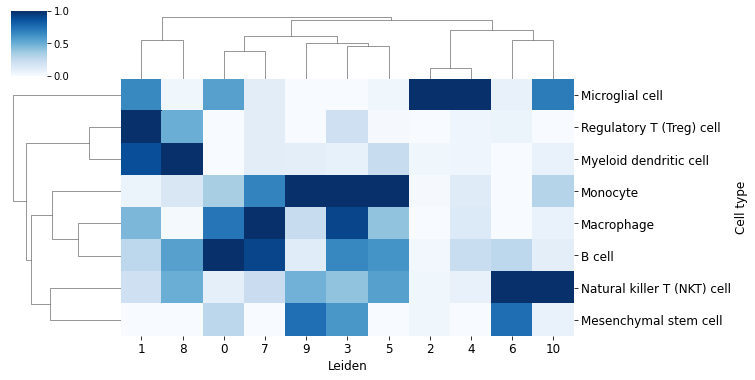

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a = sns.clustermap(k,standard_scale=1,cmap = "Blues",figsize=(10,5))
#设置聚类热图的横纵坐标标签大小
a.ax_heatmap.yaxis.set_tick_params(labelsize=12)
a.ax_heatmap.xaxis.set_tick_params(labelsize=12)
# option 1
#a.ax_heatmap.set(xlabel='Leiden',ylabel='Cell type',font={'size':12})
a.ax_heatmap.set_xlabel("Leiden", fontsize = 12)
a.ax_heatmap.set_ylabel("Cell type", fontsize = 12)
#a.ax_heatmap.set_title("Plot", fontsize = 20)
plt.savefig("fig_cell_type_ov-ftc.png",dpi=300,bbox_inches = 'tight')

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['B cell',
 'Regulatory T (Treg) cell',
 'Microglial cell',
 'Monocyte',
 'Microglial cell-1',
 'Monocyte-1',
 'Natural killer T (NKT) cell',
 'Macrophage',
 'Myeloid dendritic cell',
 'Mesenchymal stem cell',
 'Natural killer T (NKT) cell-1']

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:07)
computing UMAP
    finished (0:00:18)


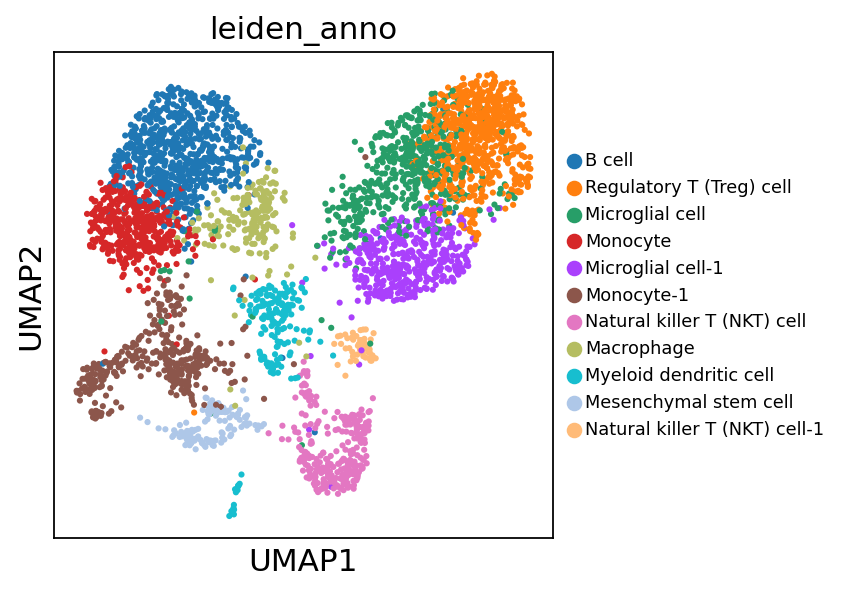

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,metric="cosine")
sc.tl.umap(adata,random_state=41822099)
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=8,)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.98579675 0.9817964  0.97875917 0.9751668  0.9551588
     0.9519735  0.9377477  0.9331147  0.9214745  0.914313   0.90688443
     0.8991573  0.8953342  0.8909768 ]
    finished (0:00:00)
computing neighbors
    finished (0:00:00)
running PAGA
    finished (0:00:00)


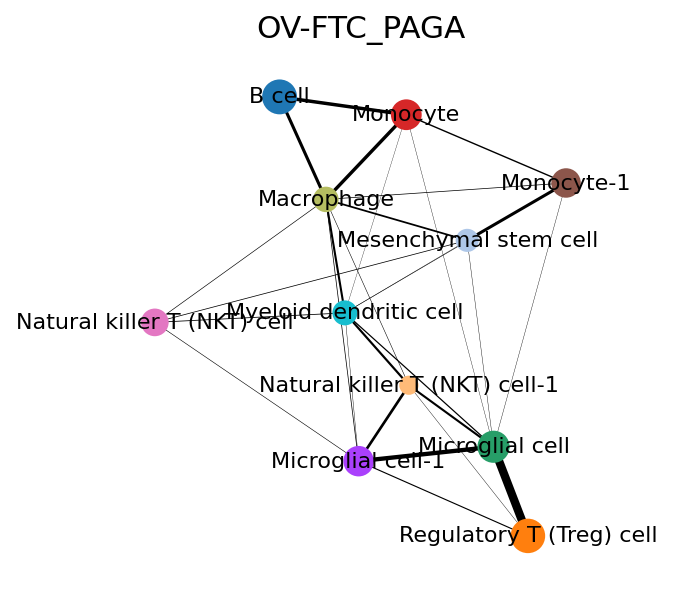

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43,save='_ov-ftc_trajectery.png',title='OV-FTC_PAGA')

running PAGA
    finished (0:00:00)


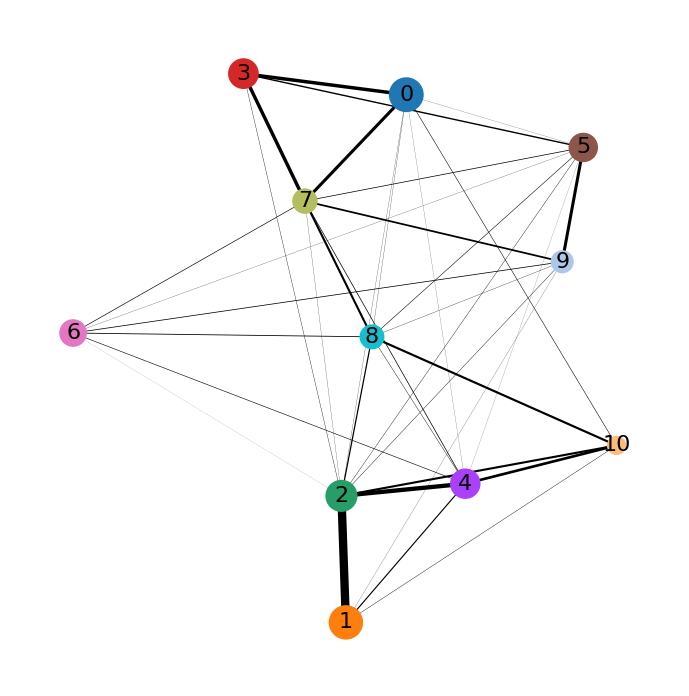

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, threshold=0.01, show=False,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43)

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == 'Mesenchymal stem cell')[0]
sc.tl.dpt(adata,)

drawing single-cell graph using layout 'fa'
    finished (0:00:28)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


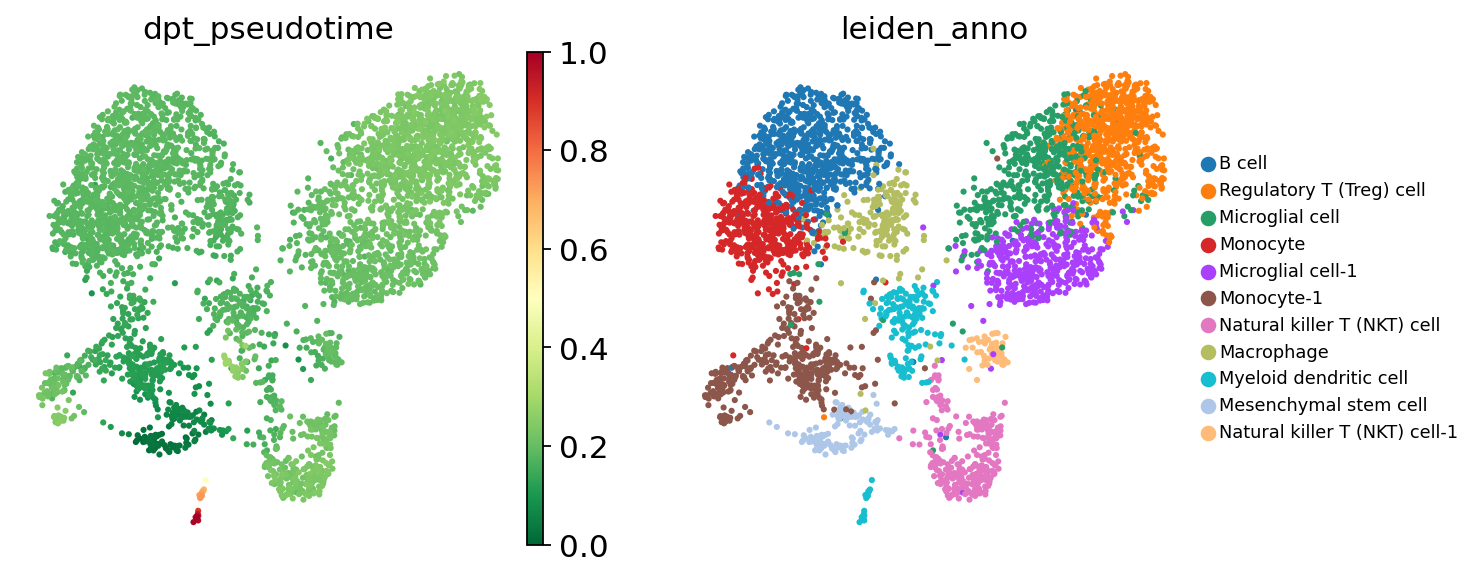

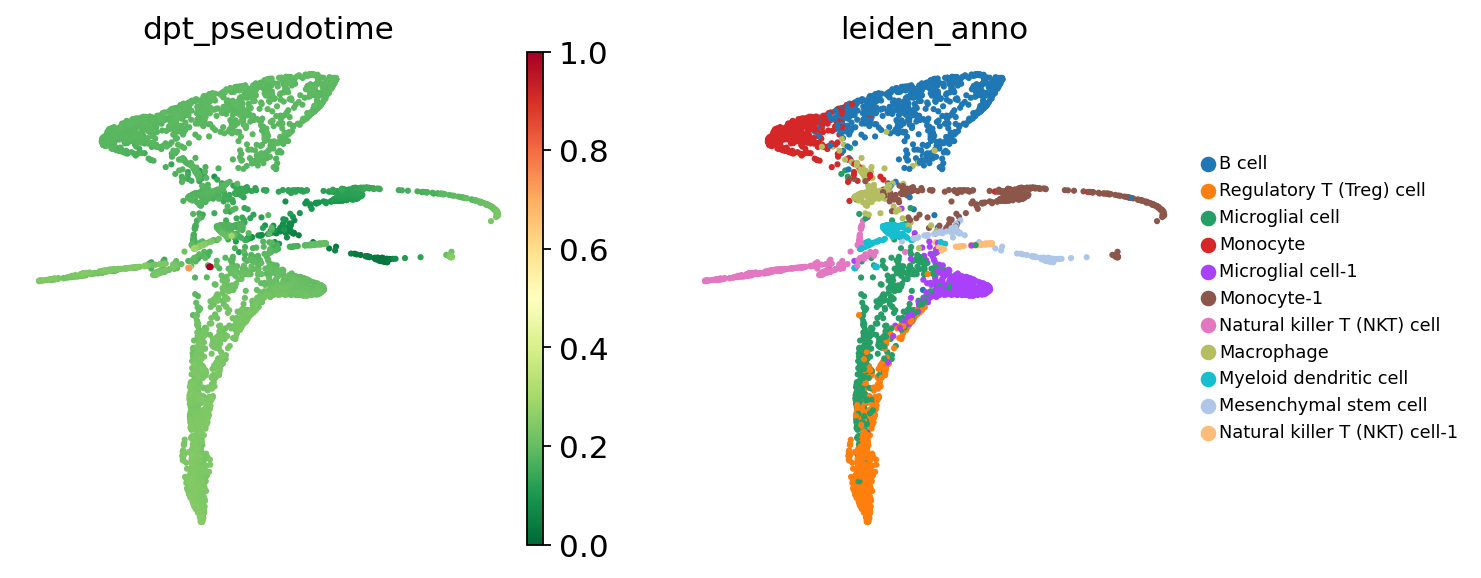

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='_ov-ftc_umap.png')
sc.pl.draw_graph(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='_ov-ftc_dpt.png')

In [ ]:
import json
path={
      'Monocyte':[9,7,3],
      'Dendritic cell':[9,8],
      'Macrophage':[9,7],
      'Microgilal cell':[9,2,4]
}
with open("/content/drive/MyDrive/SL/data/dpt/ov-ftc_dpt_json.json","w") as f:
  json.dump(path,f)

In [ ]:
newdata=anndata.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, dtype='float32')
newdata.write("/content/drive/MyDrive/SL/data/dpt/ov-ftc_dpt.h5ad", compression="gzip")

# PAAD

In [ ]:
import anndata
adata=anndata.read_h5ad("/content/Pan-Cancer/PAAD.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.leiden(adata)
len(list(set(adata.obs.leiden)))

extracting highly variable genes
    finished (0:00:00)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:00)
running Leiden clustering
    finished (0:00:00)


15

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("paad_rank.csv")
dat.to_csv("/content/drive/MyDrive/SL/data/paad_rank.csv")

ranking genes
    finished (0:00:06)


In [ ]:
%%bash
python '/content/SCSA/SCSA.py' -d '/content/SCSA/whole.db' -i paad_rank.csv -s scanpy -E -f 1.5 -p 0.01 -o '/content/paad_result.txt' -m txt 

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(Gensymbol=True, MarkerDB=None, celltype='normal', cluster='all', db='/content/SCSA/whole.db', foldchange=1.5, input='paad_rank.csv', list_tissue=False, noprint=False, norefdb=False, outfmt='txt', output='/content/paad_result.txt', pvalue=0.01, source='scanpy', species='Human', target='cellmarker', tissue='All', weight=100.0)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 45409
############################## Cluster 0 ##############################

Cell Num: 88
Gene Num: 53
Not Zero: 221
Cluster 0 Gene number: 59
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                     B cell            4.3053    1.2  
------------------------------------------------------------
             (Mesenchymal stem cell)   (3.5681)
-----------------------------------------------

In [ ]:
cmdt=pd.read_csv('paad_result.txt',sep='\t')

In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(adata.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['B cell' 4.305295746847369 0]]
[['M2 macrophage' 4.483216785352608 1]]
[['Myeloid dendritic cell' 8.09375959261035 2]]
[['Microglial cell' 4.880707800985511 3]]
[['Mast cell' 7.235639875840009 4]]
[['Mast cell' 7.228695096555135 5]]
[['Monocyte' 9.479488506060235 6]]
[['Mesenchymal stem cell' 6.500729674490706 7]]
[['Macrophage' 6.524459357085853 8]]
[['Microglial cell' 6.52943551183277 9]]
[['Hepatocyte' 8.172322578711356 10]]
[['Myeloid dendritic cell' 4.524526610724935 11]]
[['Mast cell' 7.829327519935556 12]]
[['Myeloid dendritic cell' 7.201524590152914 13]]
[['Monocyte' 6.871888635710738 14]]


In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(adata.obs.leiden))))]
#celltype[15]='Mesenchymal stem cell'
celltype

['B cell',
 'M2 macrophage',
 'Myeloid dendritic cell',
 'Microglial cell',
 'Mast cell',
 'Mast cell',
 'Monocyte',
 'Mesenchymal stem cell',
 'Macrophage',
 'Microglial cell',
 'Hepatocyte',
 'Myeloid dendritic cell',
 'Mast cell',
 'Myeloid dendritic cell',
 'Monocyte']

In [ ]:
celltype=celltype[:]
ty=list(set(celltype))
k=pd.DataFrame(index=ty)
for i in range(len(celltype)):
  test=cmdt.loc[cmdt['Cluster']==i]
  test=test.set_index(test.columns[0])
  ty1=list(set(ty).intersection(test.index.tolist()))
  k[str(i)]=test.loc[ty1]['Z-score']
k.fillna(0, inplace=True)
k.head()

0         1  ...        13        14
Myeloid dendritic cell  0.000000  3.072194  ...  7.201525  1.036354
Microglial cell         1.559692  3.370303  ...  0.057216  2.113115
B cell                  4.305296 -0.148308  ...  3.627180  3.089168
M2 macrophage           2.036762  4.483217  ... -0.426117 -0.397193
Macrophage              2.527972  2.458546  ...  0.558697  3.459064

[5 rows x 15 columns]

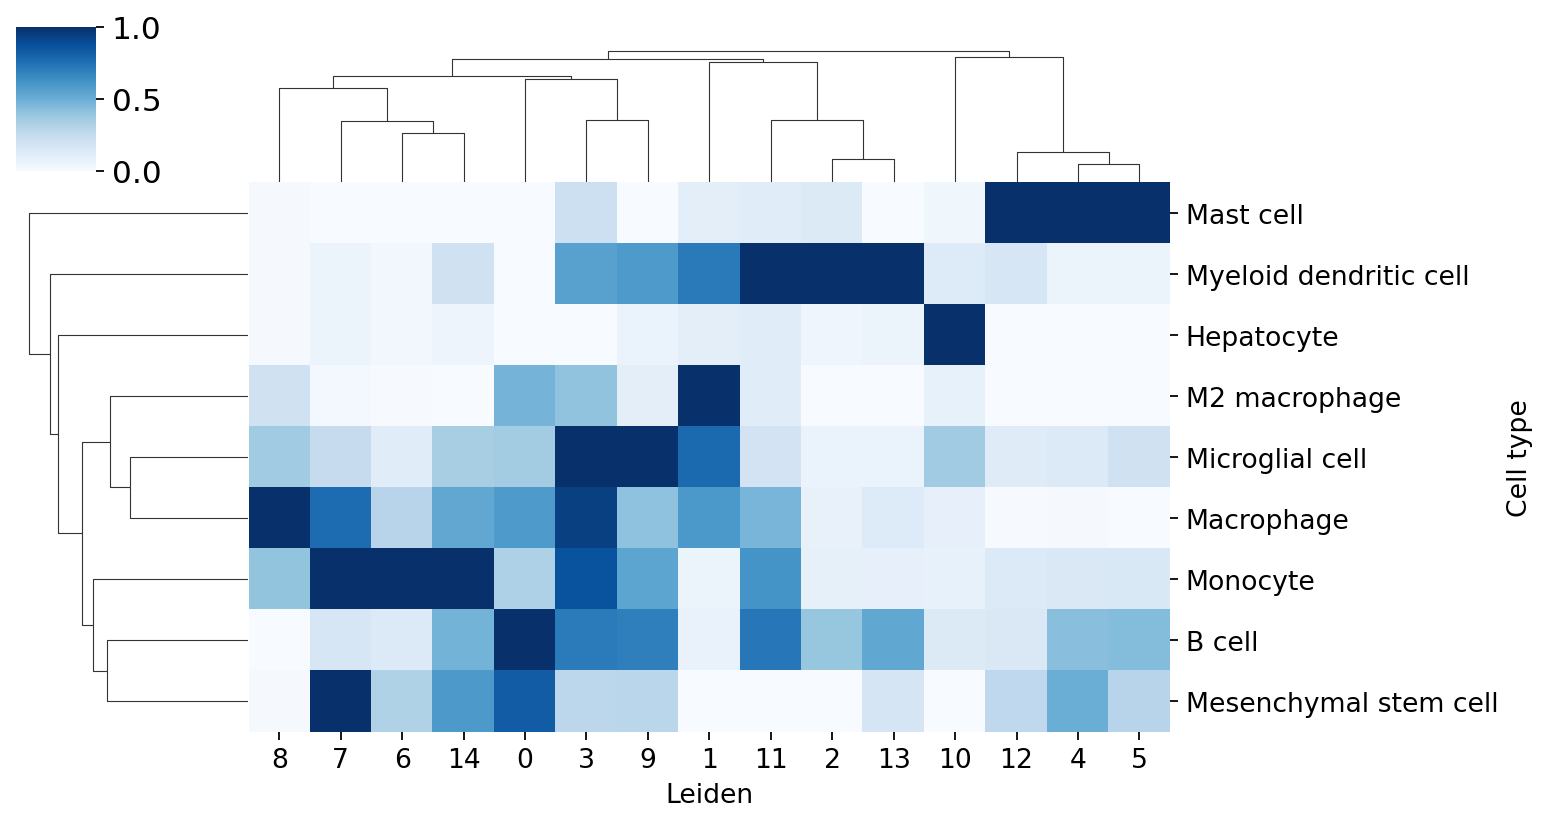

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a = sns.clustermap(k,standard_scale=1,cmap = "Blues",figsize=(10,5))
#设置聚类热图的横纵坐标标签大小
a.ax_heatmap.yaxis.set_tick_params(labelsize=12)
a.ax_heatmap.xaxis.set_tick_params(labelsize=12)
# option 1
#a.ax_heatmap.set(xlabel='Leiden',ylabel='Cell type',font={'size':12})
a.ax_heatmap.set_xlabel("Leiden", fontsize = 12)
a.ax_heatmap.set_ylabel("Cell type", fontsize = 12)
#a.ax_heatmap.set_title("Plot", fontsize = 20)
plt.savefig("fig_cell_type_paad.png",dpi=300,bbox_inches = 'tight')

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['B cell',
 'M2 macrophage',
 'Myeloid dendritic cell',
 'Microglial cell',
 'Mast cell',
 'Mast cell-1',
 'Monocyte',
 'Mesenchymal stem cell',
 'Macrophage',
 'Microglial cell-1',
 'Hepatocyte',
 'Myeloid dendritic cell-1',
 'Mast cell-2',
 'Myeloid dendritic cell-2',
 'Monocyte-1']

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:01)
computing UMAP
    finished (0:00:10)


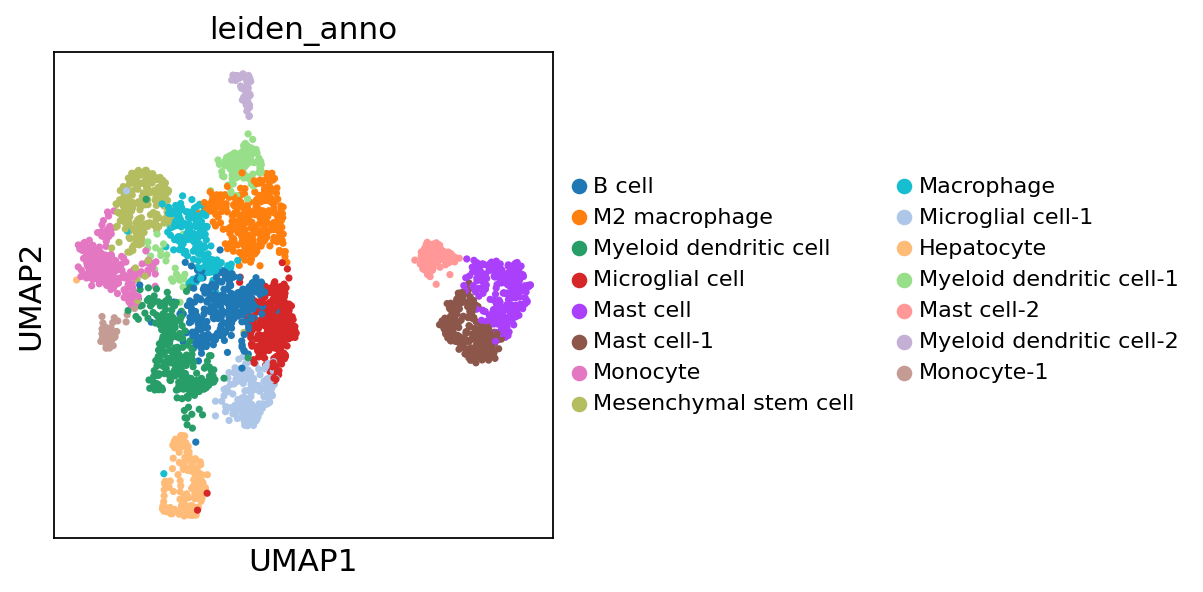

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,metric="cosine")
sc.tl.umap(adata,random_state=41822099)
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=10,)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99949044 0.98504215 0.9842729  0.9792986  0.97529787
     0.9639034  0.962055   0.95737183 0.95007473 0.941663   0.9379671
     0.93007094 0.92414427 0.91415066]
    finished (0:00:00)
computing neighbors
    finished (0:00:00)
running PAGA
    finished (0:00:00)


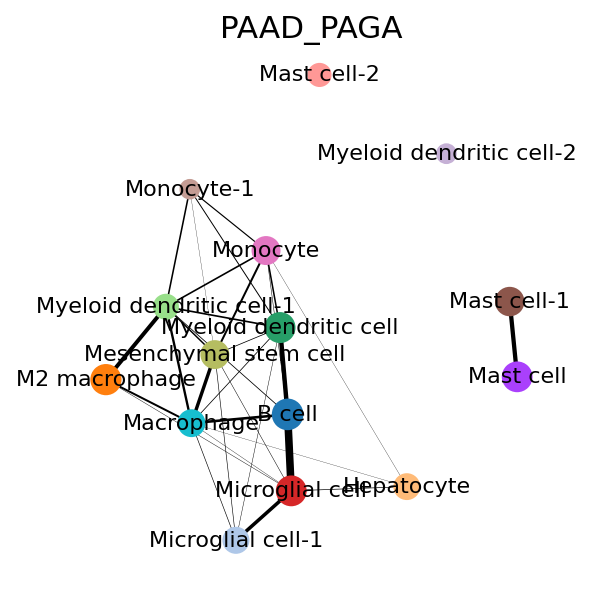

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43,save='paad_trajectery.png',title='PAAD_PAGA')

running PAGA
    finished (0:00:00)


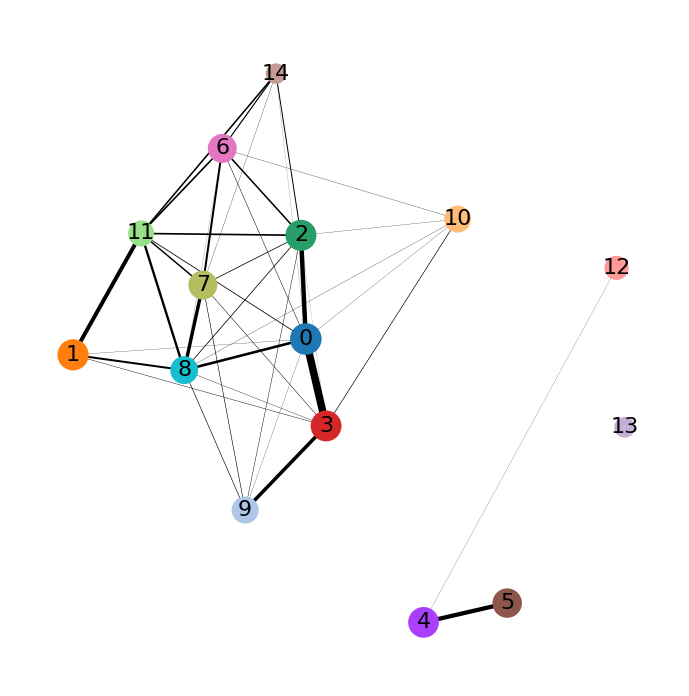

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, threshold=0.01, show=False,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43)

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == 'Mesenchymal stem cell')[0]
sc.tl.dpt(adata,)

drawing single-cell graph using layout 'fa'
    finished (0:00:17)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


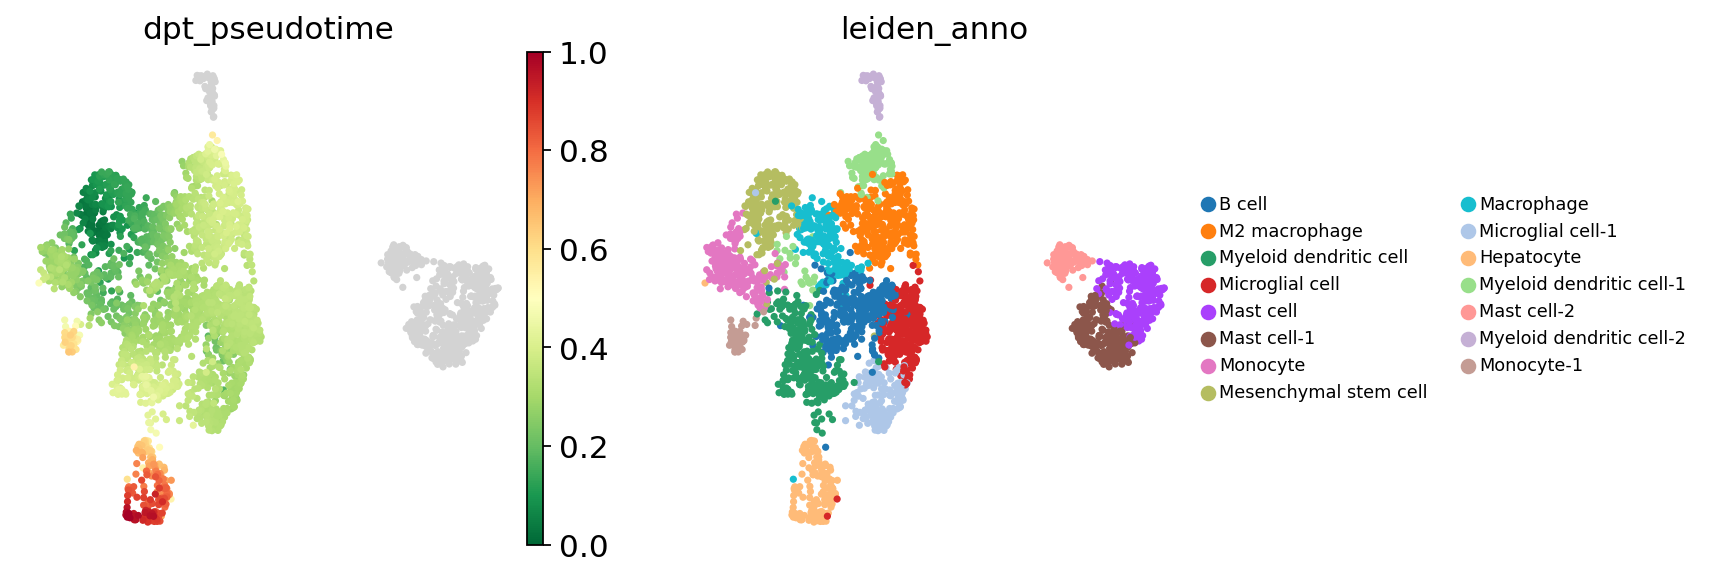

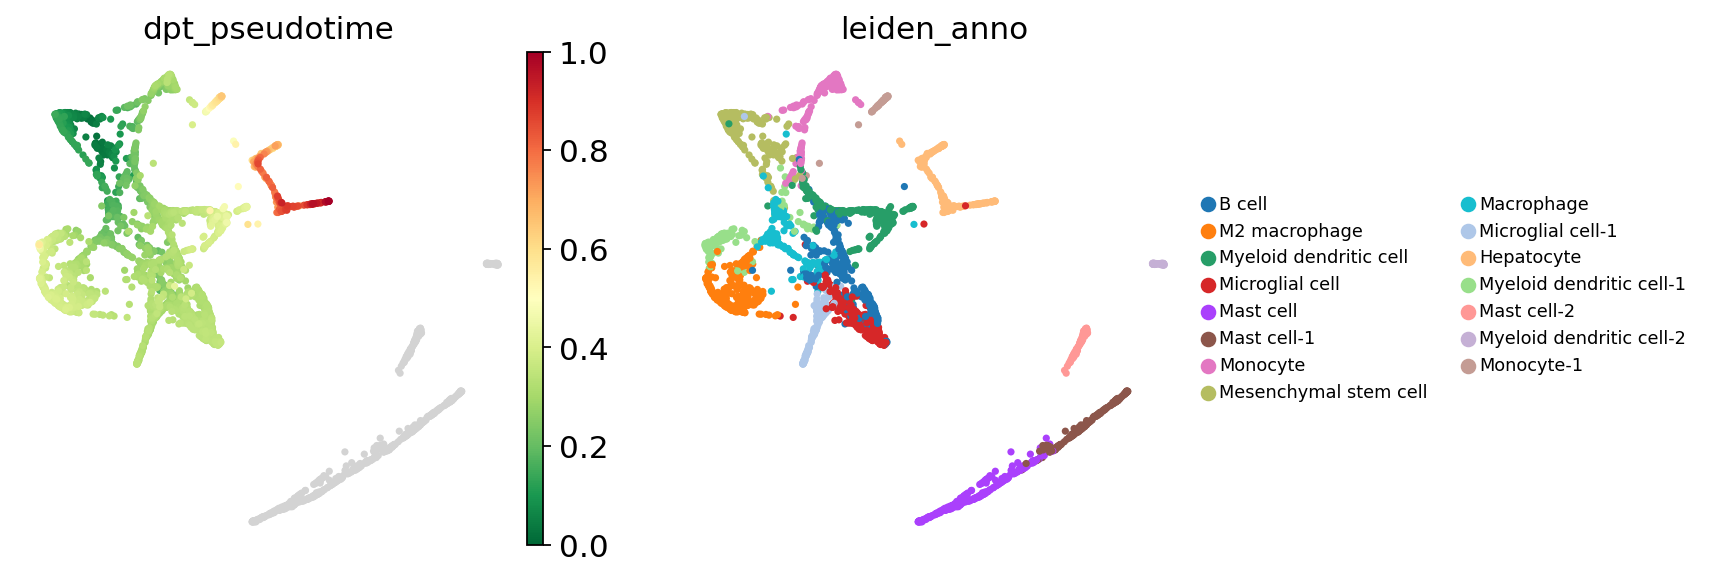

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='paad_umap.png')
sc.pl.draw_graph(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='paad_dpt.png')

In [ ]:
import json
path={
      'Monocyte':[7,6,14],
      'Dendritic cell':[7,11,2],
      'Macrophage':[7,8],
      'Microglial cell':[7,3,9]
}
with open("/content/drive/MyDrive/SL/data/dpt/paad_dpt_json.json","w") as f:
  json.dump(path,f)

In [ ]:
newdata=anndata.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, dtype='float32')
newdata.write("/content/drive/MyDrive/SL/data/dpt/paad_dpt.h5ad", compression="gzip")

# THCA


In [ ]:
import anndata
adata=anndata.read_h5ad("/content/Pan-Cancer/THCA.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.leiden(adata)
len(list(set(adata.obs.leiden)))

extracting highly variable genes
    finished (0:00:01)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:01)
running Leiden clustering
    finished (0:00:00)


21

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("thca_rank.csv")
dat.to_csv("/content/drive/MyDrive/SL/data/thca_rank.csv")

ranking genes
    finished (0:00:15)


In [ ]:
%%bash
python '/content/SCSA/SCSA.py' -d '/content/SCSA/whole.db' -i thca_rank.csv -s scanpy -E -f 1.5 -p 0.01 -o '/content/thca_result.txt' -m txt 

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(Gensymbol=True, MarkerDB=None, celltype='normal', cluster='all', db='/content/SCSA/whole.db', foldchange=1.5, input='thca_rank.csv', list_tissue=False, noprint=False, norefdb=False, outfmt='txt', output='/content/thca_result.txt', pvalue=0.01, source='scanpy', species='Human', target='cellmarker', tissue='All', weight=100.0)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 45409
############################## Cluster 0 ##############################

Cell Num: 154
Gene Num: 167
Not Zero: 608
Cluster 0 Gene number: 248
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                Microglial cell        6.4997    1.2  
------------------------------------------------------------
                    (B cell)           (5.5849)
--------------------------------------------

In [ ]:
cmdt=pd.read_csv('thca_result.txt',sep='\t')

In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(adata.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['Microglial cell' 6.499703535996741 0]]
[['Monocyte' 8.436390240050738 1]]
[['Microglial cell' 6.08586697151335 2]]
[['Mesenchymal stem cell' 8.948566179412026 3]]
[['Myeloid dendritic cell' 7.328528577335073 4]]
[['Dendritic cell' 4.694652263151837 5]]
[['Monocyte' 7.44592137765852 6]]
[['Plasmacytoid dendritic cell' 10.05566556340076 7]]
[['Endothelial cell' 5.261027811662009 8]]
[['Monocyte' 7.161735499632662 9]]
[['Macrophage' 4.570317564818283 10]]
[['Astrocyte' 5.062326878847539 11]]
[['Macrophage' 6.380861449193079 12]]
[['Myeloid dendritic cell' 5.808504492930114 13]]
[['Natural killer cell' 5.656644511284398 14]]
[['Myeloid dendritic cell' 9.286759934061378 15]]
[['T cell' 5.581349133450086 16]]
[['Mast cell' 7.926833267212673 17]]
[['T cell' 7.930488388081657 18]]
[['Myeloid dendritic cell' 8.236291838623853 19]]
[['B cell' 6.313980388428428 20]]


In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(adata.obs.leiden))))]
#celltype[15]='Mesenchymal stem cell'
celltype

['Microglial cell',
 'Monocyte',
 'Microglial cell',
 'Mesenchymal stem cell',
 'Myeloid dendritic cell',
 'Dendritic cell',
 'Monocyte',
 'Plasmacytoid dendritic cell',
 'Endothelial cell',
 'Monocyte',
 'Macrophage',
 'Astrocyte',
 'Macrophage',
 'Myeloid dendritic cell',
 'Natural killer cell',
 'Myeloid dendritic cell',
 'T cell',
 'Mast cell',
 'T cell',
 'Myeloid dendritic cell',
 'B cell']

In [ ]:
celltype=celltype[:]
ty=list(set(celltype))
k=pd.DataFrame(index=ty)
for i in range(len(celltype)):
  test=cmdt.loc[cmdt['Cluster']==i]
  test=test.set_index(test.columns[0])
  ty1=list(set(ty).intersection(test.index.tolist()))
  k[str(i)]=test.loc[ty1]['Z-score']
k.fillna(0, inplace=True)
k.head()

0         1  ...        19        20
Myeloid dendritic cell       5.494875  0.991946  ...  8.236292  1.441013
Plasmacytoid dendritic cell -0.044110 -0.329707  ...  0.580616  0.751234
Microglial cell              6.499704  0.471006  ...  0.394586  1.816731
B cell                       5.584945  0.393774  ...  1.291321  6.313980
Macrophage                  -0.005139  1.989240  ...  0.044041 -0.280871

[5 rows x 21 columns]

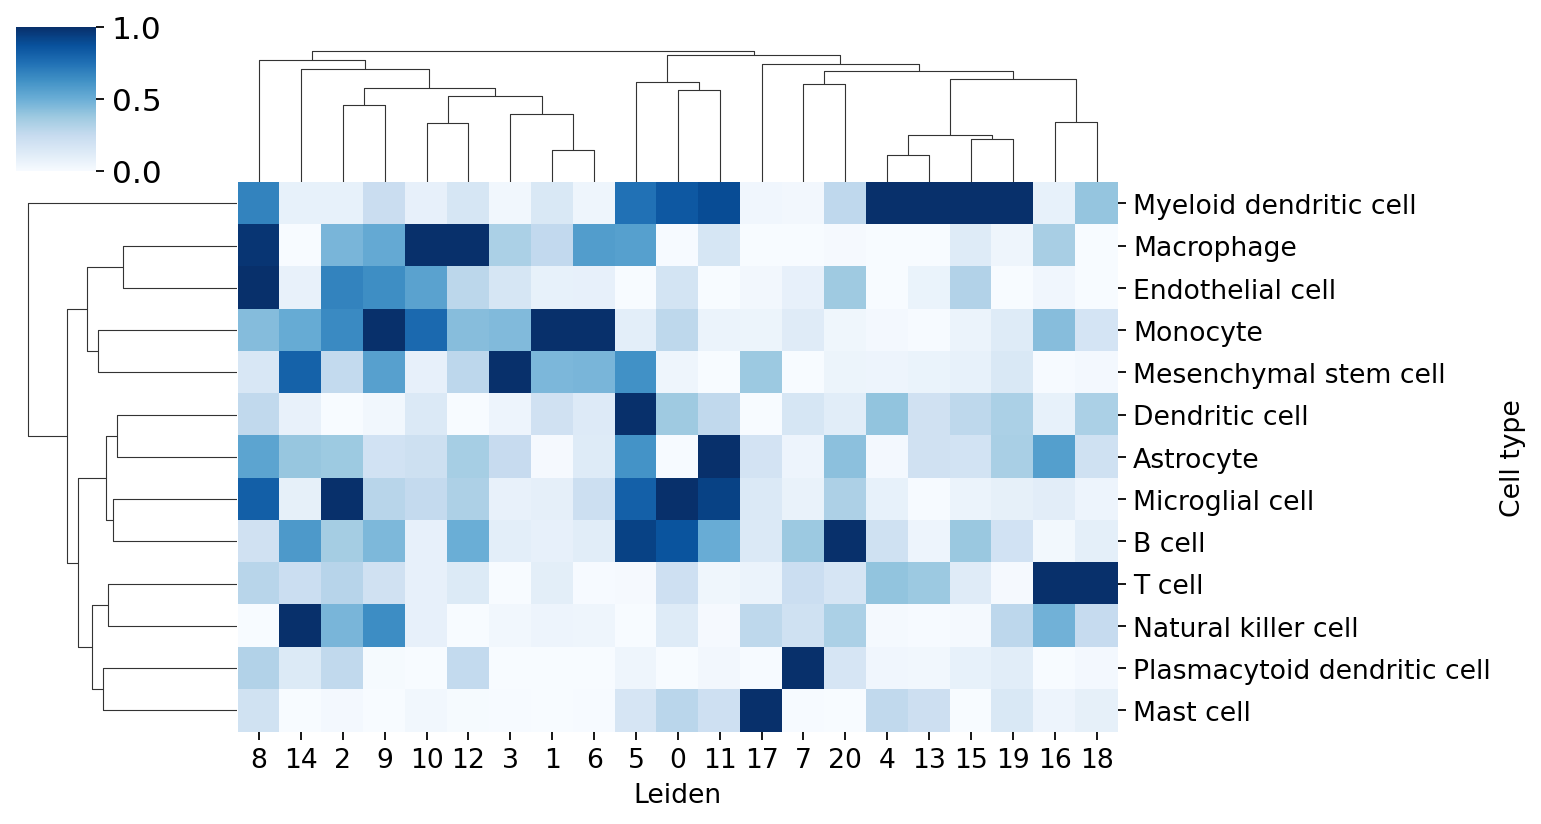

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a = sns.clustermap(k,standard_scale=1,cmap = "Blues",figsize=(10,5))
#设置聚类热图的横纵坐标标签大小
a.ax_heatmap.yaxis.set_tick_params(labelsize=12)
a.ax_heatmap.xaxis.set_tick_params(labelsize=12)
# option 1
#a.ax_heatmap.set(xlabel='Leiden',ylabel='Cell type',font={'size':12})
a.ax_heatmap.set_xlabel("Leiden", fontsize = 12)
a.ax_heatmap.set_ylabel("Cell type", fontsize = 12)
#a.ax_heatmap.set_title("Plot", fontsize = 20)
plt.savefig("fig_cell_type_thca.png",dpi=300,bbox_inches = 'tight')

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['Microglial cell',
 'Monocyte',
 'Microglial cell-1',
 'Mesenchymal stem cell',
 'Myeloid dendritic cell',
 'Dendritic cell',
 'Monocyte-1',
 'Plasmacytoid dendritic cell',
 'Endothelial cell',
 'Monocyte-2',
 'Macrophage',
 'Astrocyte',
 'Macrophage-1',
 'Myeloid dendritic cell-1',
 'Natural killer cell',
 'Myeloid dendritic cell-2',
 'T cell',
 'Mast cell',
 'T cell-1',
 'Myeloid dendritic cell-3',
 'B cell']

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing UMAP
    finished (0:00:23)


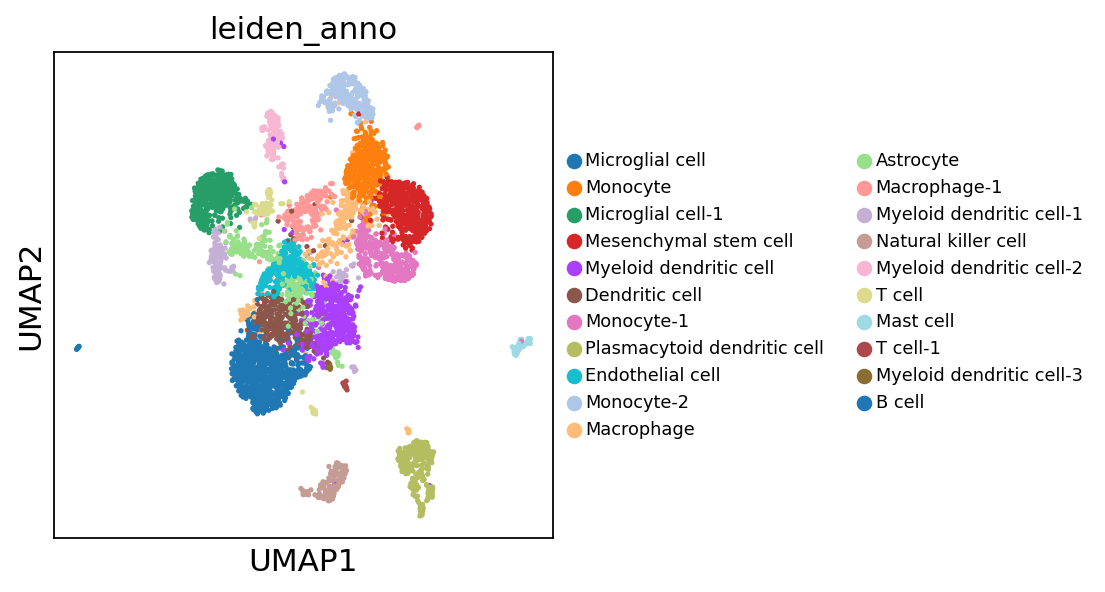

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,metric="cosine")
sc.tl.umap(adata,random_state=41822099)
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=8,)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.        1.        1.        1.        1.        0.9999986 0.9994202
     0.9992266 0.9991361 0.9990322 0.9987215 0.998292  0.9982093 0.9977571
     0.9974434]
    finished (0:00:01)
computing neighbors
    finished (0:00:01)
running PAGA
    finished (0:00:00)


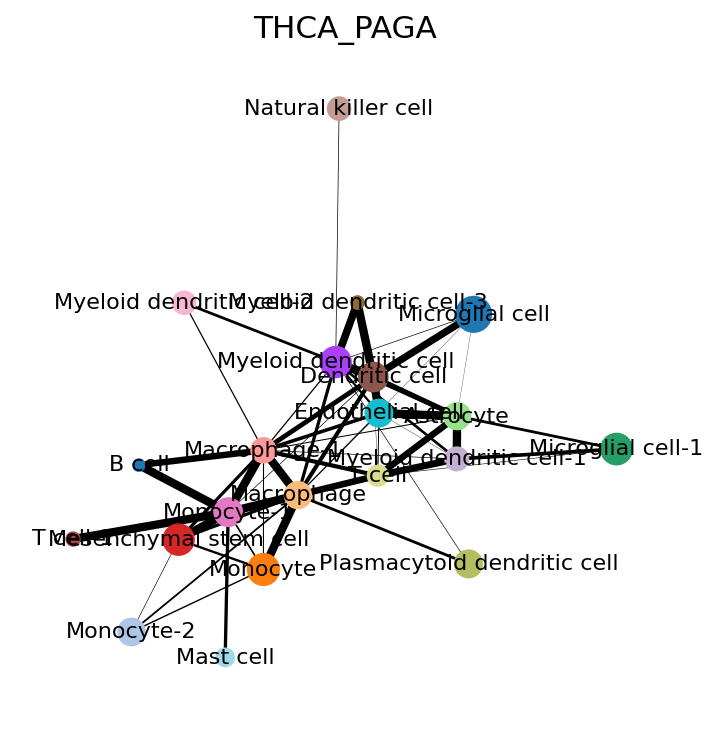

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=53,save='thca_trajectery.png',title='THCA_PAGA')

running PAGA
    finished (0:00:00)


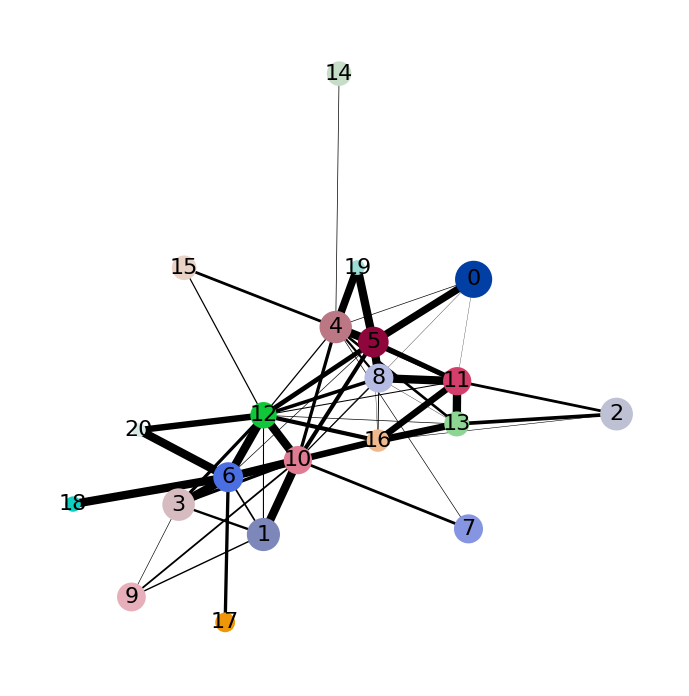

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, threshold=0.03, show=False,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=53)

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == 'Mesenchymal stem cell')[0]
sc.tl.dpt(adata,)

drawing single-cell graph using layout 'fa'
    finished (0:00:38)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


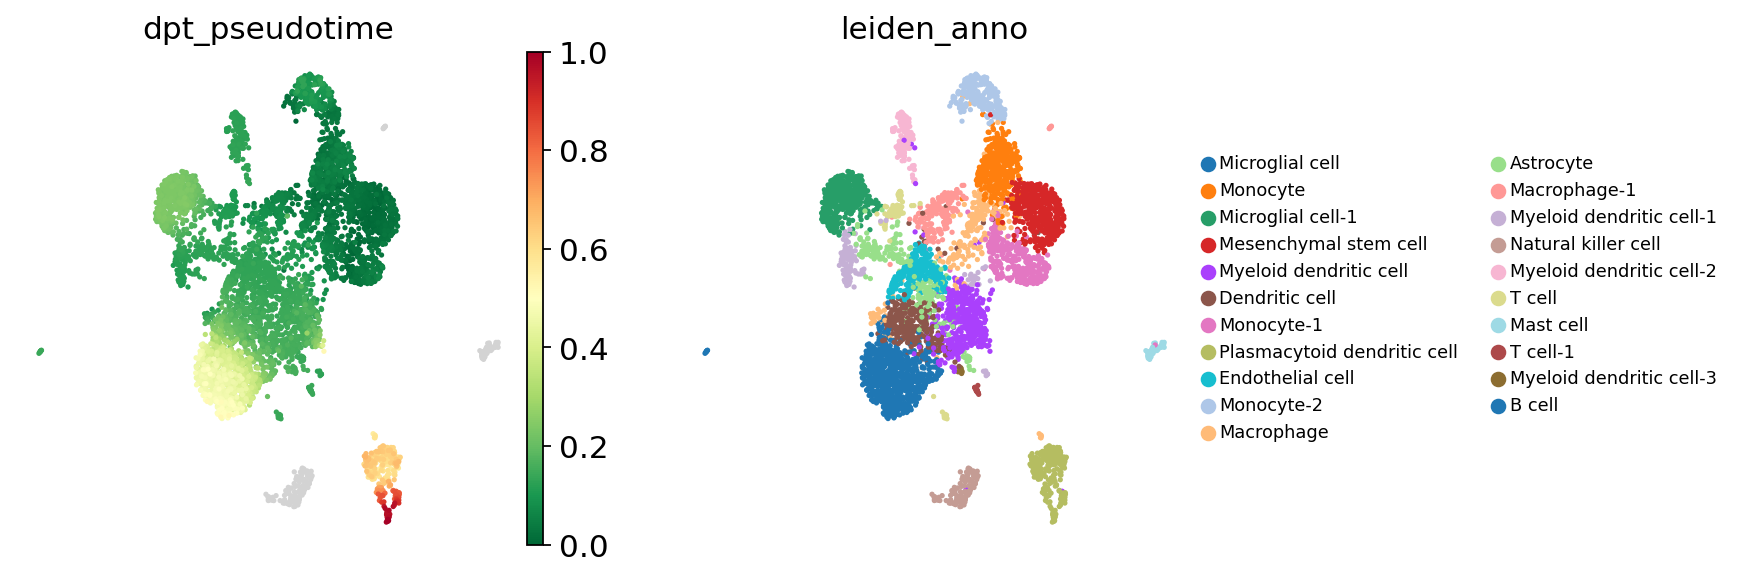

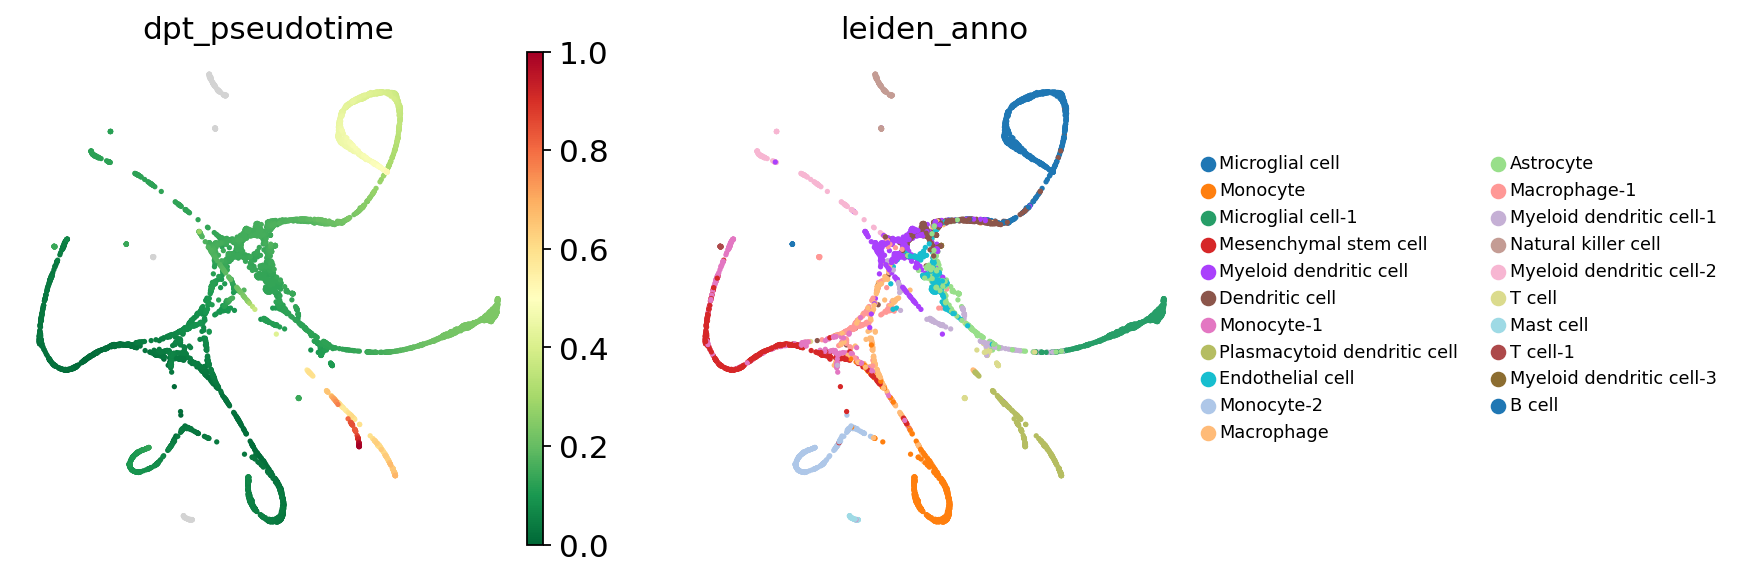

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='thca_umap.png')
sc.pl.draw_graph(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='thca_dpt.png')

In [ ]:
import json
path={
      'Monocyte':[3,6,1,9],
      'Dendritic cell':[3,12,13,4,15,19,5],
      'Macrophage':[3,10,12],
      'Microglial cell':[3,12,11,2,0]
}
with open("/content/drive/MyDrive/SL/data/dpt/thca_dpt_json.json","w") as f:
  json.dump(path,f)

In [ ]:
newdata=anndata.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, dtype='float32')
newdata.write("/content/drive/MyDrive/SL/data/dpt/thca_dpt.h5ad", compression="gzip")

# UCEC

In [ ]:
import anndata
adata=anndata.read_h5ad("/content/Pan-Cancer/UCEC.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.leiden(adata)
len(list(set(adata.obs.leiden)))

extracting highly variable genes
    finished (0:00:03)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:11)
running Leiden clustering
    finished (0:00:01)


17

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("ucec_rank.csv")
dat.to_csv("/content/drive/MyDrive/SL/data/ucec_rank.csv")

ranking genes
    finished (0:00:21)


In [ ]:
%%bash
python '/content/SCSA/SCSA.py' -d '/content/SCSA/whole.db' -i ucec_rank.csv -s scanpy -E -f 1.5 -p 0.01 -o '/content/ucec_result.txt' -m txt 

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(Gensymbol=True, MarkerDB=None, celltype='normal', cluster='all', db='/content/SCSA/whole.db', foldchange=1.5, input='ucec_rank.csv', list_tissue=False, noprint=False, norefdb=False, outfmt='txt', output='/content/ucec_result.txt', pvalue=0.01, source='scanpy', species='Human', target='cellmarker', tissue='All', weight=100.0)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 45409
############################## Cluster 0 ##############################

Cell Num: 96
Gene Num: 57
Not Zero: 233
Cluster 0 Gene number: 69
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                     B cell            4.5753    1.2  
------------------------------------------------------------
             (Mesenchymal stem cell)   (3.8827)
-----------------------------------------------

In [ ]:
cmdt=pd.read_csv('ucec_result.txt',sep='\t')

In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(adata.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['B cell' 4.575319537266351 0]]
[['Mesenchymal stem cell' 6.1917087473111945 1]]
[['Microglial cell' 7.041267562582671 2]]
[['Monocyte' 7.420448215460309 3]]
[['Myeloid dendritic cell' 7.786109225164866 4]]
[['Mast cell' 8.572349836690755 5]]
[['Microglial cell' 4.3959216528011815 6]]
[['Monocyte' 6.612660749198396 7]]
[['Mitotic arrest phase fetal germ cell' 4.004727943624859 8]]
[['Microglial cell' 6.980945521599629 9]]
[['Neutrophil' 5.016693810382108 10]]
[['Microglial cell' 5.850332162378389 11]]
[['Plasmacytoid dendritic cell' 11.003915693304368 12]]
[['B cell' 5.374894672833515 13]]
[['Myeloid dendritic cell' 7.246997859752183 14]]
[['Monocyte' 4.24248295782775 15]]
[['Microglial cell' 5.575749683480989 16]]


In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(adata.obs.leiden))))]
#celltype[15]='Mesenchymal stem cell'
celltype

['B cell',
 'Mesenchymal stem cell',
 'Microglial cell',
 'Monocyte',
 'Myeloid dendritic cell',
 'Mast cell',
 'Microglial cell',
 'Monocyte',
 'Mitotic arrest phase fetal germ cell',
 'Microglial cell',
 'Neutrophil',
 'Microglial cell',
 'Plasmacytoid dendritic cell',
 'B cell',
 'Myeloid dendritic cell',
 'Monocyte',
 'Microglial cell']

In [ ]:
celltype=celltype[:]
ty=list(set(celltype))
k=pd.DataFrame(index=ty)
for i in range(len(celltype)):
  test=cmdt.loc[cmdt['Cluster']==i]
  test=test.set_index(test.columns[0])
  ty1=list(set(ty).intersection(test.index.tolist()))
  k[str(i)]=test.loc[ty1]['Z-score']
k.fillna(0, inplace=True)
k.head()

0         1  ...        15        16
Mitotic arrest phase fetal germ cell -0.182871 -0.103673  ... -0.148047 -0.119008
Myeloid dendritic cell                0.000000  0.000000  ...  0.000000  1.374207
Plasmacytoid dendritic cell           0.000000 -0.426080  ... -0.294949  1.509297
Microglial cell                      -0.388905 -0.388577  ... -0.120307  5.575750
Neutrophil                            1.864289  3.375787  ...  4.059774  1.954868

[5 rows x 17 columns]

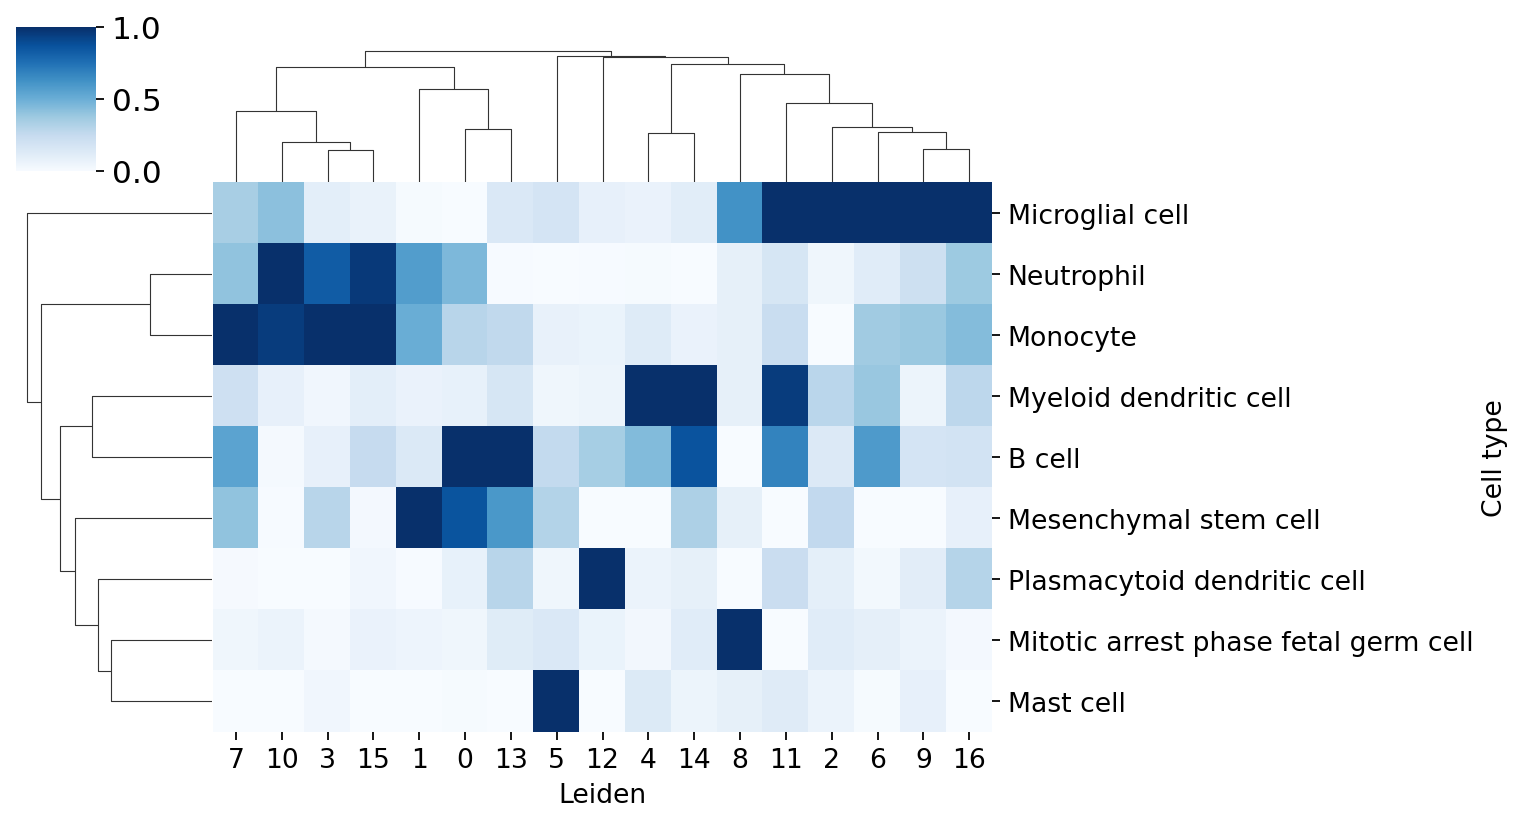

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a = sns.clustermap(k,standard_scale=1,cmap = "Blues",figsize=(10,5))
#设置聚类热图的横纵坐标标签大小
a.ax_heatmap.yaxis.set_tick_params(labelsize=12)
a.ax_heatmap.xaxis.set_tick_params(labelsize=12)
# option 1
#a.ax_heatmap.set(xlabel='Leiden',ylabel='Cell type',font={'size':12})
a.ax_heatmap.set_xlabel("Leiden", fontsize = 12)
a.ax_heatmap.set_ylabel("Cell type", fontsize = 12)
#a.ax_heatmap.set_title("Plot", fontsize = 20)
plt.savefig("fig_cell_type_ucec.png",dpi=300,bbox_inches = 'tight')

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['B cell',
 'Mesenchymal stem cell',
 'Microglial cell',
 'Monocyte',
 'Myeloid dendritic cell',
 'Mast cell',
 'Microglial cell-1',
 'Monocyte-1',
 'Mitotic arrest phase fetal germ cell',
 'Microglial cell-2',
 'Neutrophil',
 'Microglial cell-3',
 'Plasmacytoid dendritic cell',
 'B cell-1',
 'Myeloid dendritic cell-1',
 'Monocyte-2',
 'Microglial cell-4']

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:01)
computing UMAP
    finished (0:00:26)


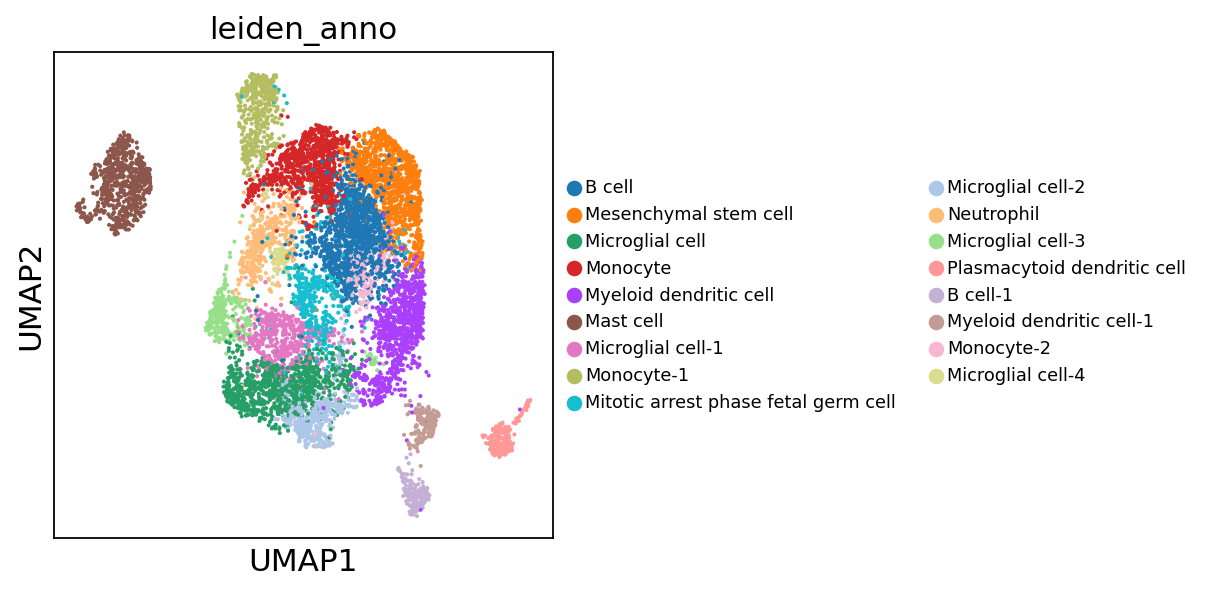

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,metric="cosine")
sc.tl.umap(adata,random_state=41822099)
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=8,)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.9967491  0.9916891  0.9854298  0.9780952
     0.9769196  0.973293   0.9680927  0.9651397  0.9571731  0.95436615
     0.9471343  0.9434429  0.9394823 ]
    finished (0:00:00)
computing neighbors
    finished (0:00:02)
running PAGA
    finished (0:00:00)


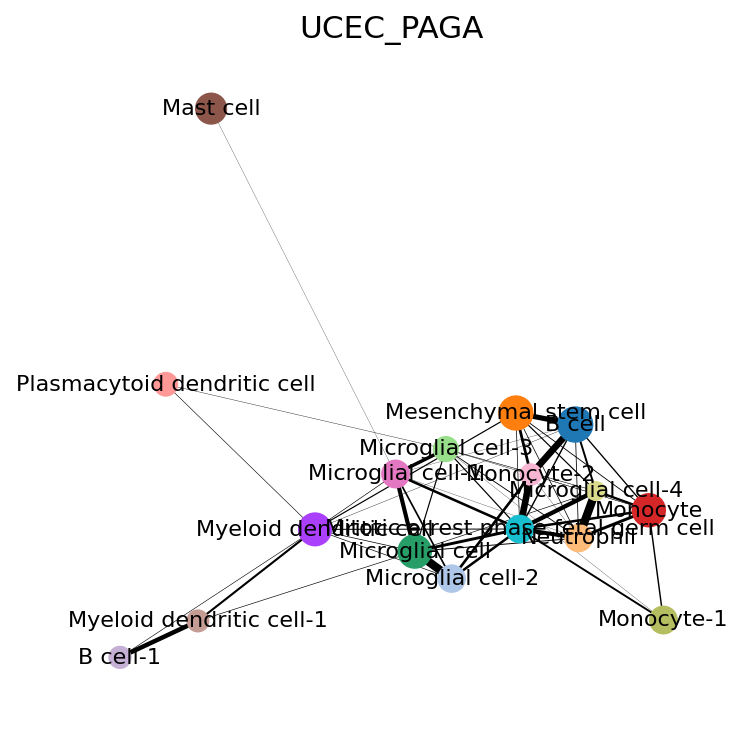

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=53,save='ucec_trajectery.png',title='UCEC_PAGA')

running PAGA
    finished (0:00:00)


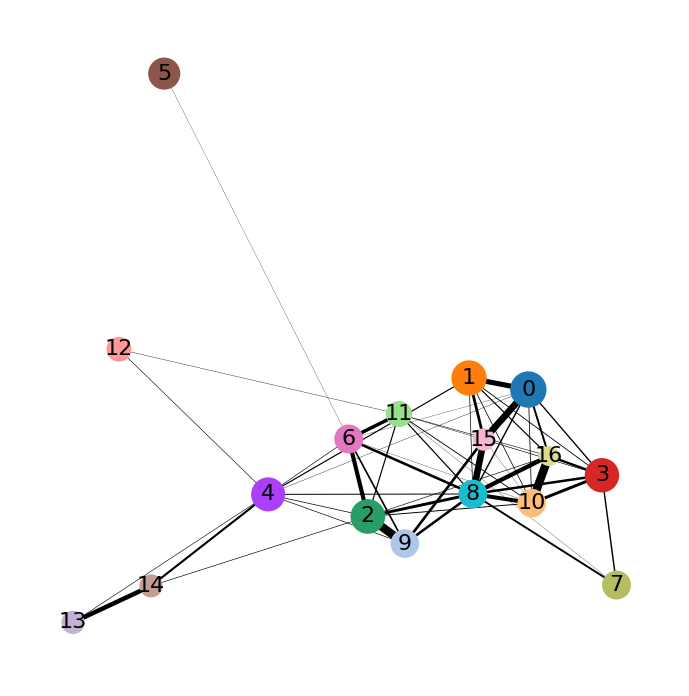

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, threshold=0.03, show=False,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=53)

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == 'Mesenchymal stem cell')[0]
sc.tl.dpt(adata,)

drawing single-cell graph using layout 'fa'
    finished (0:01:14)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


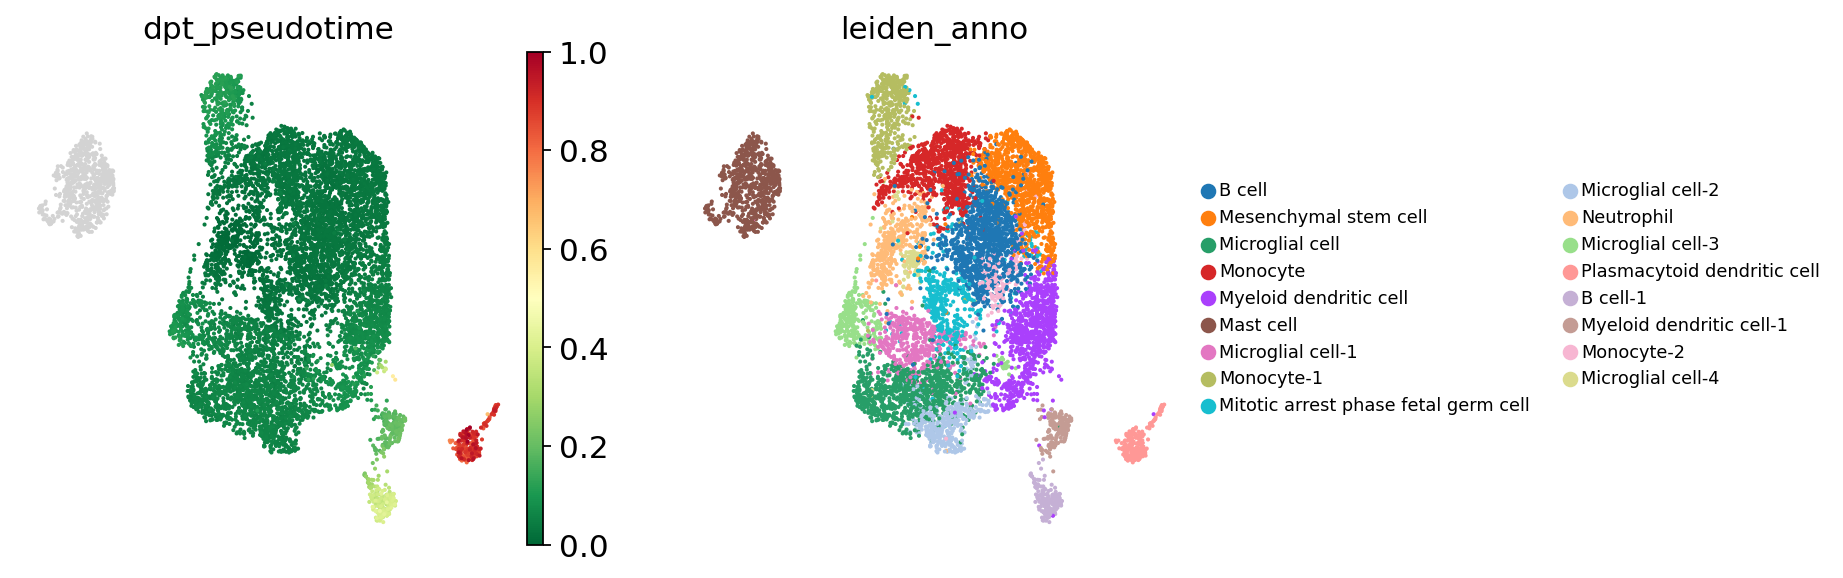

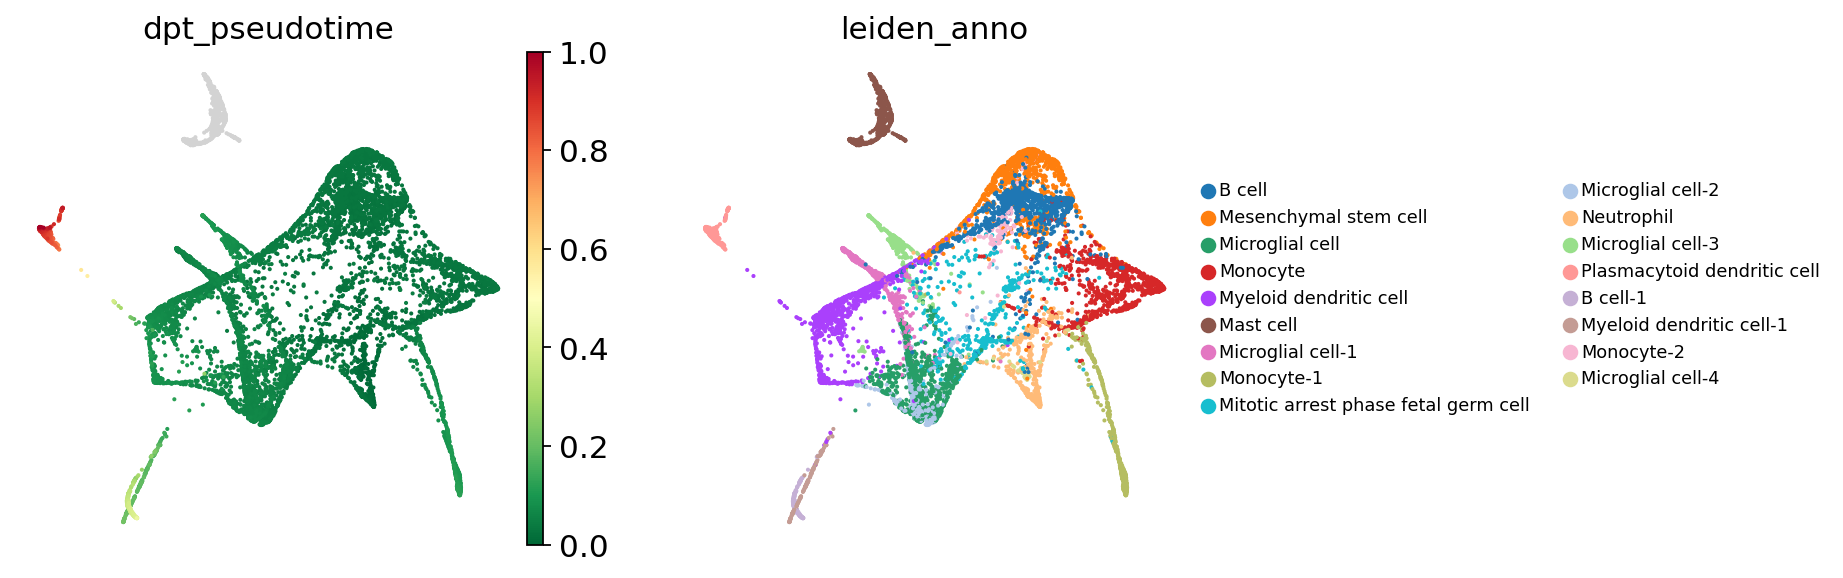

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='ucec_umap.png')
sc.pl.draw_graph(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='ucec_dpt.png')

In [ ]:
import json
path={
      'Monocyte':[1,15,3,7],
      'Dendritic cell':[1,4,14],
      'Neutrophil':[1,10],
      'Microglial cell':[1,16,11,6,2,9]
}
with open("/content/drive/MyDrive/SL/data/dpt/ucec_dpt_json.json","w") as f:
  json.dump(path,f)

In [ ]:
newdata=anndata.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, dtype='float32')
newdata.write("/content/drive/MyDrive/SL/data/dpt/ucec_dpt.h5ad", compression="gzip")

# cDC2

In [ ]:
import anndata
adata=anndata.read_h5ad("/content/Pan-Cancer/cDC2.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.leiden(adata)
len(list(set(adata.obs.leiden)))

extracting highly variable genes
    finished (0:00:01)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:01)
running Leiden clustering
    finished (0:00:00)


15

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("cdc2_rank.csv")
dat.to_csv("/content/drive/MyDrive/SL/data/cdc2_rank.csv")

ranking genes
    finished (0:00:12)


In [ ]:
%%bash
python '/content/SCSA/SCSA.py' -d '/content/SCSA/whole.db' -i cdc2_rank.csv -s scanpy -E -f 1.5 -p 0.01 -o '/content/cdc2_result.txt' -m txt 

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(Gensymbol=True, MarkerDB=None, celltype='normal', cluster='all', db='/content/SCSA/whole.db', foldchange=1.5, input='cdc2_rank.csv', list_tissue=False, noprint=False, norefdb=False, outfmt='txt', output='/content/cdc2_result.txt', pvalue=0.01, source='scanpy', species='Human', target='cellmarker', tissue='All', weight=100.0)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 45409
############################## Cluster 0 ##############################

Cell Num: 43
Gene Num: 21
Not Zero: 68
Cluster 0 Gene number: 26
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?            Regulatory T (Treg) cell   3.7573    1.4  
------------------------------------------------------------
                   (Mast cell)         (2.7422)
------------------------------------------------

In [ ]:
cmdt=pd.read_csv('cdc2_result.txt',sep='\t')

In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(adata.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['Regulatory T (Treg) cell' 3.7573327728317656 0]]
[['Regulatory T (Treg) cell' 5.607502277157533 1]]
[['Microglial cell' 4.164595246227252 2]]
[['Mast cell' 3.2526395451580123 3]]
[['Myeloid dendritic cell' 5.095646361477266 4]]
[['Acinar cell' 5.468216382008854 5]]
[['Monocyte' 3.372093410366677 6]]
[['Monocyte' 4.2551064712753615 7]]
[['Myeloid dendritic cell' 5.582226758097042 8]]
[['Microglial cell' 6.0429583316498805 9]]
[['Hematopoietic stem cell' 3.2402074078371967 10]]
[['B cell' 5.135173488813472 11]]
[['Natural killer cell' 4.229208151384412 12]]
[['T cell' 8.523179129118223 13]]
[['Neutrophil' 5.85392243279307 14]]


In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(adata.obs.leiden))))]
#celltype[15]='Mesenchymal stem cell'
celltype

['Regulatory T (Treg) cell',
 'Regulatory T (Treg) cell',
 'Microglial cell',
 'Mast cell',
 'Myeloid dendritic cell',
 'Acinar cell',
 'Monocyte',
 'Monocyte',
 'Myeloid dendritic cell',
 'Microglial cell',
 'Hematopoietic stem cell',
 'B cell',
 'Natural killer cell',
 'T cell',
 'Neutrophil']

In [ ]:
celltype=celltype[:]
ty=list(set(celltype))
k=pd.DataFrame(index=ty)
for i in range(len(celltype)):
  test=cmdt.loc[cmdt['Cluster']==i]
  test=test.set_index(test.columns[0])
  ty1=list(set(ty).intersection(test.index.tolist()))
  k[str(i)]=test.loc[ty1]['Z-score']
k.fillna(0, inplace=True)
k.head()

0         1  ...        13        14
Myeloid dendritic cell    0.000000  0.000000  ...  1.696767  0.000000
Microglial cell           2.193658 -0.120098  ...  1.121053  0.109365
Regulatory T (Treg) cell  3.757333  5.607502  ... -0.339871 -0.364190
B cell                   -0.202812  1.394324  ...  0.480921 -0.279277
Acinar cell              -0.476833  0.000000  ... -0.269840 -0.332267

[5 rows x 15 columns]

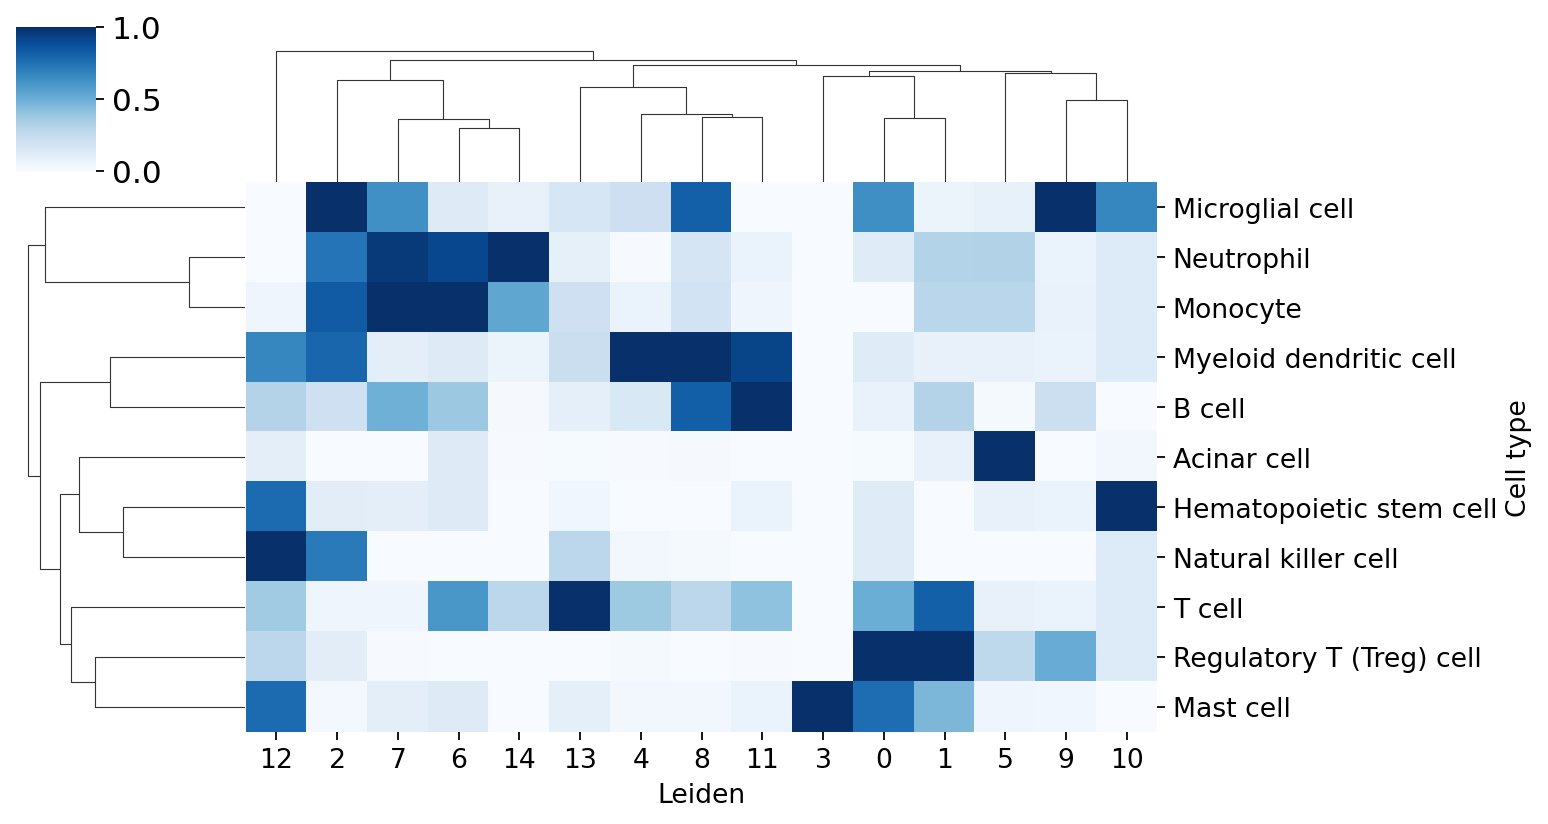

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a = sns.clustermap(k,standard_scale=1,cmap = "Blues",figsize=(10,5))
#设置聚类热图的横纵坐标标签大小
a.ax_heatmap.yaxis.set_tick_params(labelsize=12)
a.ax_heatmap.xaxis.set_tick_params(labelsize=12)
# option 1
#a.ax_heatmap.set(xlabel='Leiden',ylabel='Cell type',font={'size':12})
a.ax_heatmap.set_xlabel("Leiden", fontsize = 12)
a.ax_heatmap.set_ylabel("Cell type", fontsize = 12)
#a.ax_heatmap.set_title("Plot", fontsize = 20)
plt.savefig("fig_cell_type_cdc2.png",dpi=300,bbox_inches = 'tight')

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['Regulatory T (Treg) cell',
 'Regulatory T (Treg) cell-1',
 'Microglial cell',
 'Mast cell',
 'Myeloid dendritic cell',
 'Acinar cell',
 'Monocyte',
 'Monocyte-1',
 'Myeloid dendritic cell-1',
 'Microglial cell-1',
 'Hematopoietic stem cell',
 'B cell',
 'Natural killer cell',
 'T cell',
 'Neutrophil']

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:00)
computing UMAP
    finished (0:00:20)


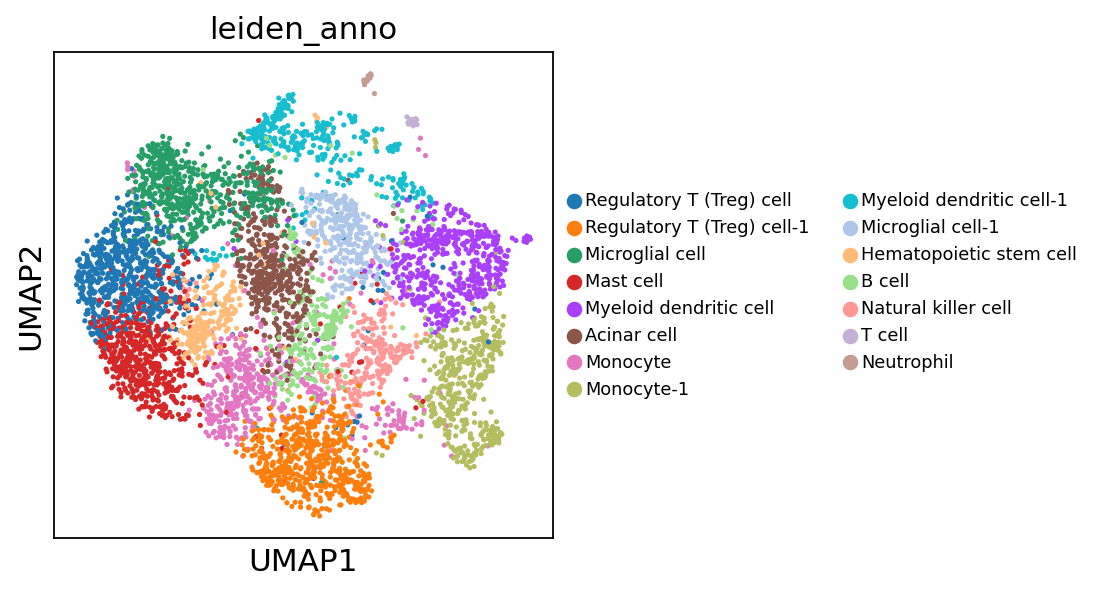

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,metric="cosine")
sc.tl.umap(adata,random_state=41822099)
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=8,)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9695788  0.96397495 0.960478   0.9570472  0.9491238
     0.94596356 0.93407375 0.92847234 0.91926706 0.9166723  0.9111398
     0.9088738  0.9032803  0.8963064 ]
    finished (0:00:00)
computing neighbors
    finished (0:00:01)
running PAGA
    finished (0:00:00)


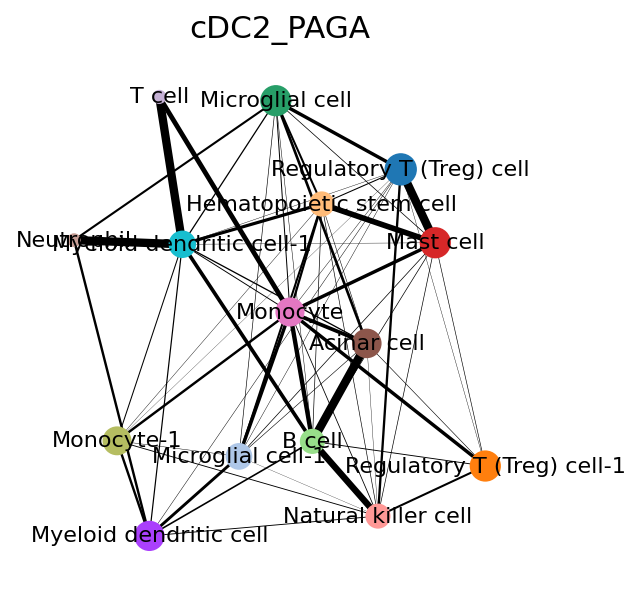

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43,save='cdc2_trajectery.png',title='cDC2_PAGA')

running PAGA
    finished (0:00:00)


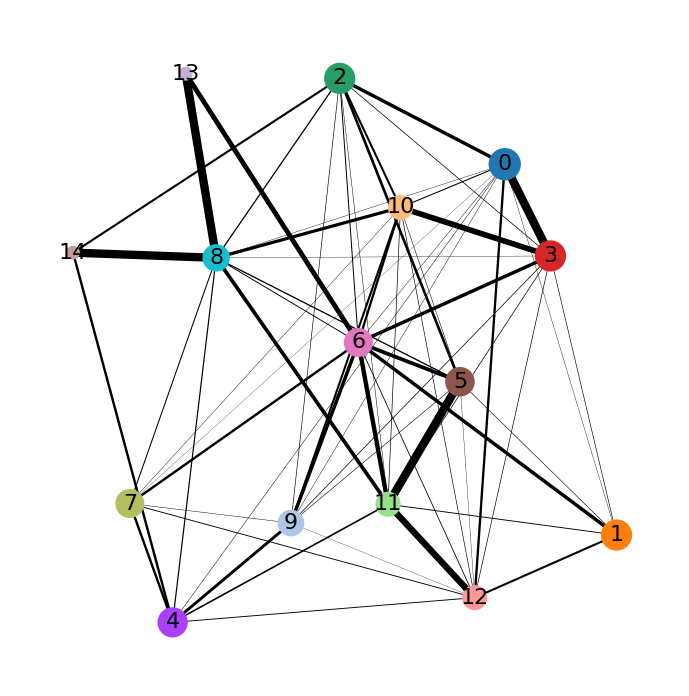

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, threshold=0.03, show=False,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43)

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == 'Hematopoietic stem cell')[0]
sc.tl.dpt(adata,)

drawing single-cell graph using layout 'fa'
    finished (0:00:41)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


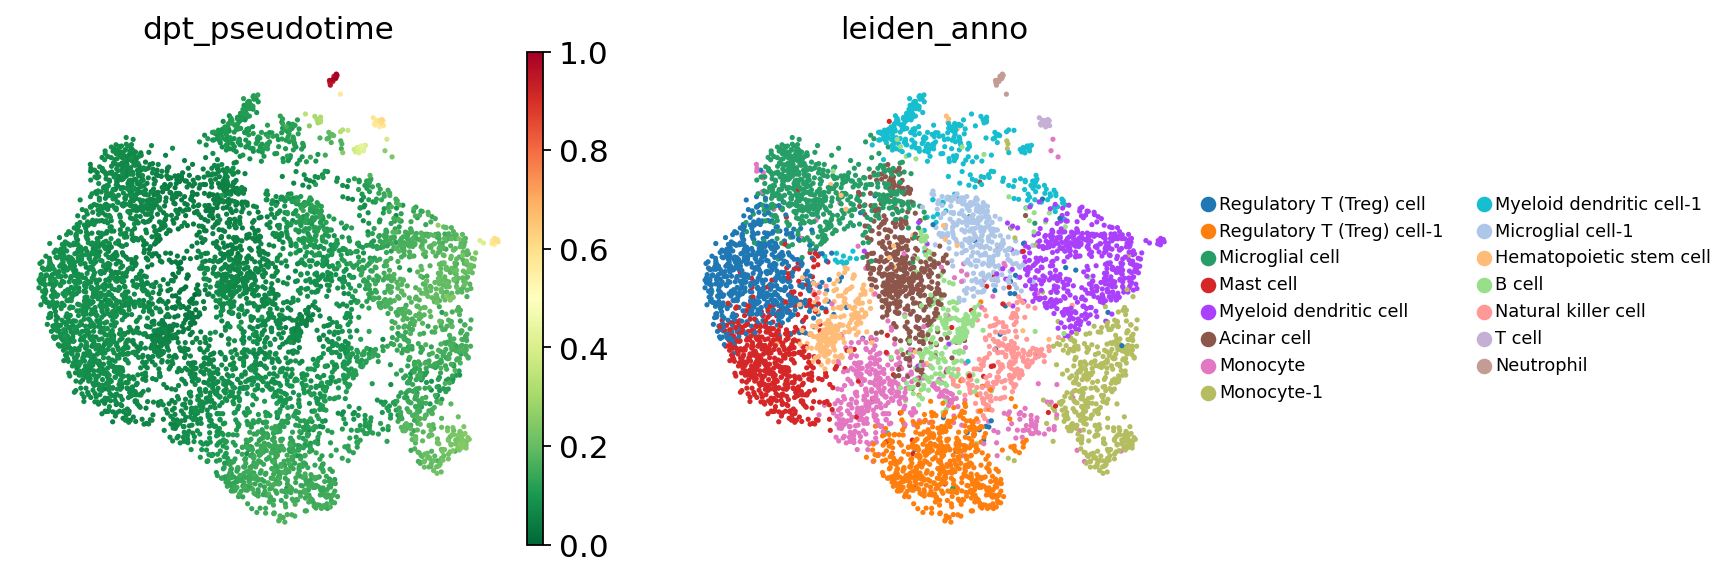

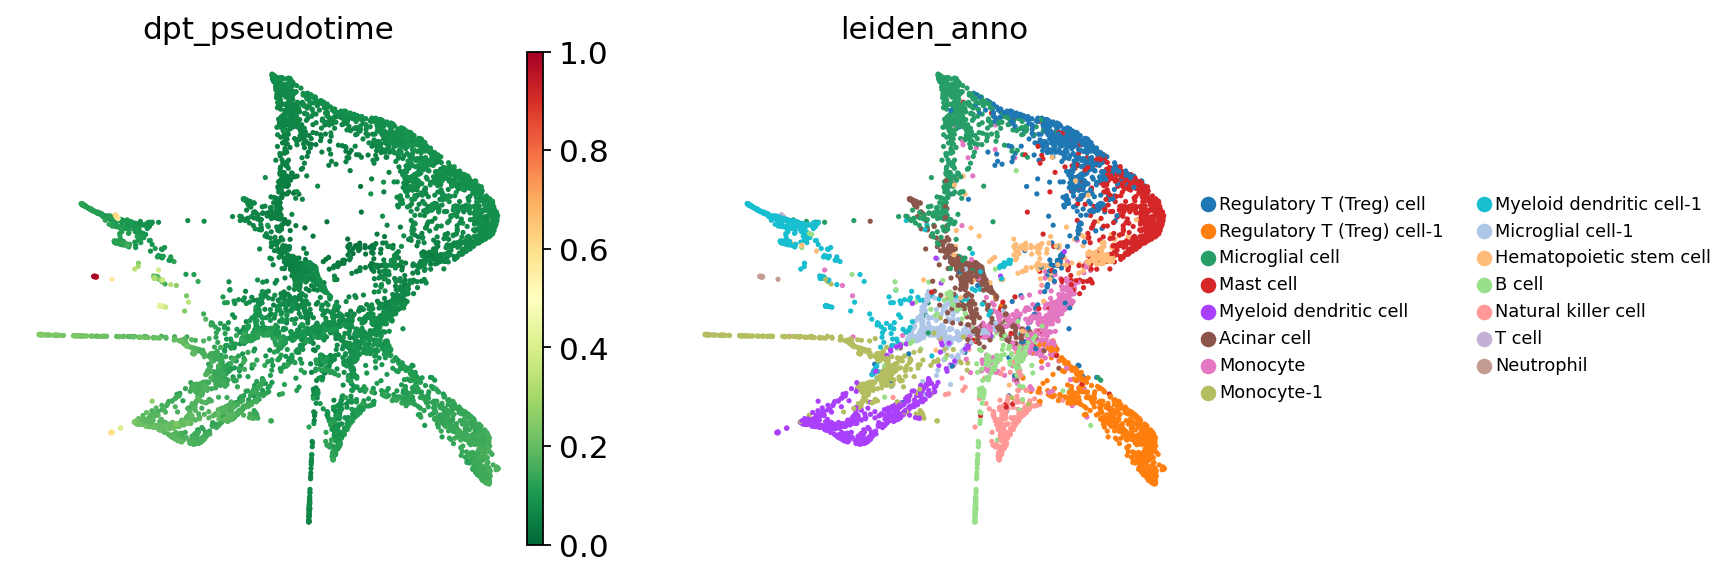

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='cdc2_umap.png')
sc.pl.draw_graph(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='cdc2_dpt.png')

In [ ]:
import json
path={
      'Monocyte':[10,6,7],
      'Dendritic cell':[10,8,4],
      'Neutrophil':[10,8,14],
      'Microglial cell':[10,2,9]
}
with open("/content/drive/MyDrive/SL/data/dpt/cdc2_dpt_json.json","w") as f:
  json.dump(path,f)

In [ ]:
newdata=anndata.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, dtype='float32')
newdata.write("/content/drive/MyDrive/SL/data/dpt/cdc2_dpt.h5ad", compression="gzip")

# ESCA

In [ ]:
import anndata
adata=anndata.read_h5ad("/content/Pan-Cancer/ESCA.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.leiden(adata)
len(list(set(adata.obs.leiden)))

extracting highly variable genes
    finished (0:00:01)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:02)
running Leiden clustering
    finished (0:00:01)


17

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("esca_rank.csv")
dat.to_csv("/content/drive/MyDrive/SL/data/esca_rank.csv")

ranking genes
    finished (0:00:18)


In [ ]:
%%bash
python '/content/SCSA/SCSA.py' -d '/content/SCSA/whole.db' -i esca_rank.csv -s scanpy -E -f 1.5 -p 0.01 -o '/content/esca_result.txt' -m txt 

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(Gensymbol=True, MarkerDB=None, celltype='normal', cluster='all', db='/content/SCSA/whole.db', foldchange=1.5, input='esca_rank.csv', list_tissue=False, noprint=False, norefdb=False, outfmt='txt', output='/content/esca_result.txt', pvalue=0.01, source='scanpy', species='Human', target='cellmarker', tissue='All', weight=100.0)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 45409
############################## Cluster 0 ##############################

Cell Num: 85
Gene Num: 67
Not Zero: 220
Cluster 0 Gene number: 104
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?          Natural killer T (NKT) cell  4.4106    1.0  
------------------------------------------------------------
                   (Astrocyte)         (4.3890)
----------------------------------------------

In [ ]:
cmdt=pd.read_csv('esca_result.txt',sep='\t')

In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(adata.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['Natural killer T (NKT) cell' 4.410621831696196 0]]
[['Monocyte' 6.67468270591083 1]]
[['Monocyte' 6.643215621771592 2]]
[['Monocyte' 6.69832069026306 3]]
[['Myeloid dendritic cell' 8.224120810774442 4]]
[['Endothelial cell' 5.929385846523162 5]]
[['Mast cell' 6.928538474111175 6]]
[['Regulatory T (Treg) cell' 3.7643619484535065 7]]
[['M2 macrophage' 4.367029162962024 8]]
[['Regulatory T (Treg) cell' 4.312152296649123 9]]
[['Macrophage' 5.793925181609563 10]]
[['Macrophage' 5.619305512809644 11]]
[['Myeloid dendritic cell' 7.8941353051707 12]]
[['Monocyte' 6.394363999921927 13]]
[['Endothelial cell' 4.896034771255096 14]]
[['Microglial cell' 5.468822326826988 15]]
[['Plasmacytoid dendritic cell' 10.432626773991052 16]]


In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(adata.obs.leiden))))]
#celltype[15]='Mesenchymal stem cell'
celltype

['Natural killer T (NKT) cell',
 'Monocyte',
 'Monocyte',
 'Monocyte',
 'Myeloid dendritic cell',
 'Endothelial cell',
 'Mast cell',
 'Regulatory T (Treg) cell',
 'M2 macrophage',
 'Regulatory T (Treg) cell',
 'Macrophage',
 'Macrophage',
 'Myeloid dendritic cell',
 'Monocyte',
 'Endothelial cell',
 'Microglial cell',
 'Plasmacytoid dendritic cell']

In [ ]:
celltype=celltype[:]
ty=list(set(celltype))
k=pd.DataFrame(index=ty)
for i in range(len(celltype)):
  test=cmdt.loc[cmdt['Cluster']==i]
  test=test.set_index(test.columns[0])
  ty1=list(set(ty).intersection(test.index.tolist()))
  k[str(i)]=test.loc[ty1]['Z-score']
k.fillna(0, inplace=True)
k.head()

0         1  ...        15         16
Natural killer T (NKT) cell  4.410622  0.762517  ...  0.744558   4.499624
Myeloid dendritic cell       0.000000  0.000000  ...  1.752374   0.317709
Plasmacytoid dendritic cell -0.054042 -0.323261  ... -0.116035  10.432627
Microglial cell              4.014914 -0.125415  ...  5.468822   0.559130
Regulatory T (Treg) cell    -0.489866 -0.289606  ...  0.000000  -0.314142

[5 rows x 17 columns]

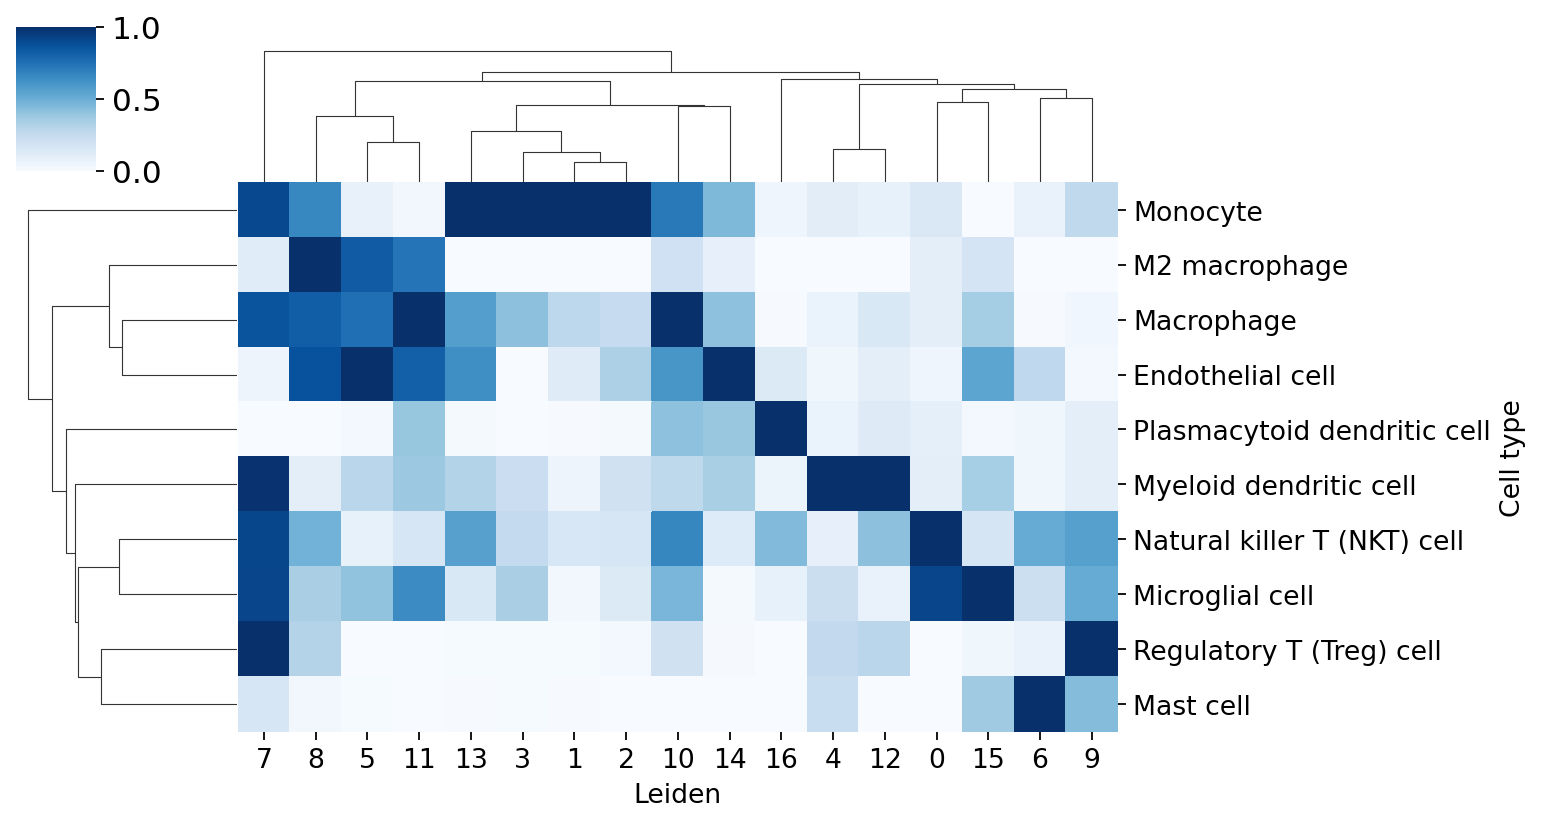

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
a = sns.clustermap(k,standard_scale=1,cmap = "Blues",figsize=(10,5))
#设置聚类热图的横纵坐标标签大小
a.ax_heatmap.yaxis.set_tick_params(labelsize=12)
a.ax_heatmap.xaxis.set_tick_params(labelsize=12)
# option 1
#a.ax_heatmap.set(xlabel='Leiden',ylabel='Cell type',font={'size':12})
a.ax_heatmap.set_xlabel("Leiden", fontsize = 12)
a.ax_heatmap.set_ylabel("Cell type", fontsize = 12)
#a.ax_heatmap.set_title("Plot", fontsize = 20)
plt.savefig("fig_cell_type_esca.png",dpi=300,bbox_inches = 'tight')

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['Natural killer T (NKT) cell',
 'Monocyte',
 'Monocyte-1',
 'Monocyte-2',
 'Myeloid dendritic cell',
 'Endothelial cell',
 'Mast cell',
 'Regulatory T (Treg) cell',
 'M2 macrophage',
 'Regulatory T (Treg) cell-1',
 'Macrophage',
 'Macrophage-1',
 'Myeloid dendritic cell-1',
 'Monocyte-3',
 'Endothelial cell-1',
 'Microglial cell',
 'Plasmacytoid dendritic cell']

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:01)
computing UMAP
    finished (0:00:28)


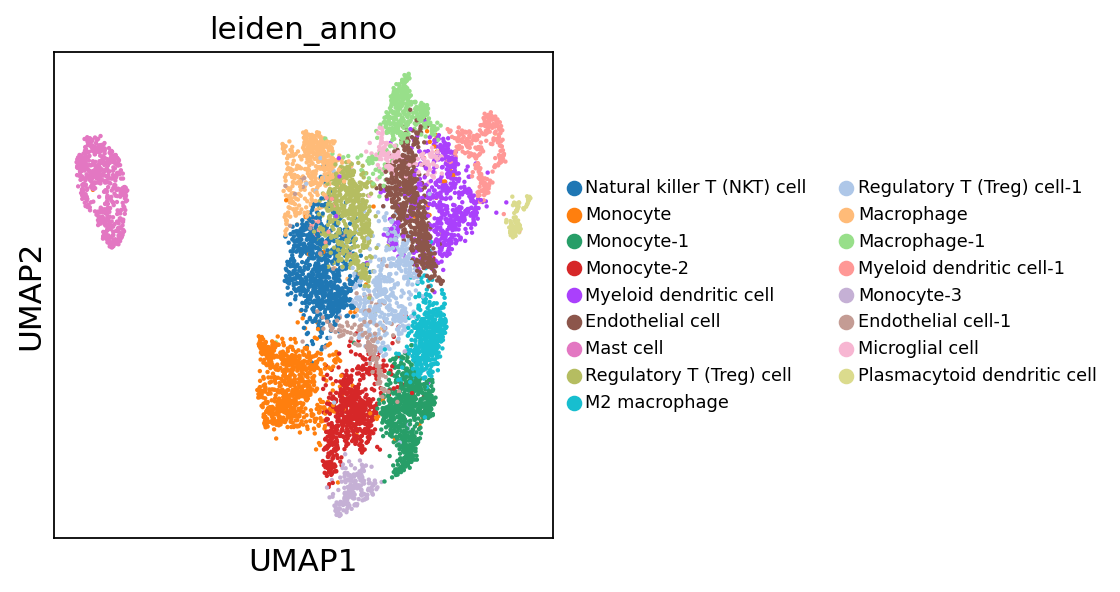

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,metric="cosine")
sc.tl.umap(adata,random_state=41822099)
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.5,legend_fontsize=8,)

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         1.         0.9867592  0.9821584  0.9763904  0.9656074
     0.964025   0.9637004  0.95359635 0.94958276 0.9469294  0.9440016
     0.94077414 0.9357317  0.93117046]
    finished (0:00:00)
computing neighbors
    finished (0:00:02)
running PAGA
    finished (0:00:00)


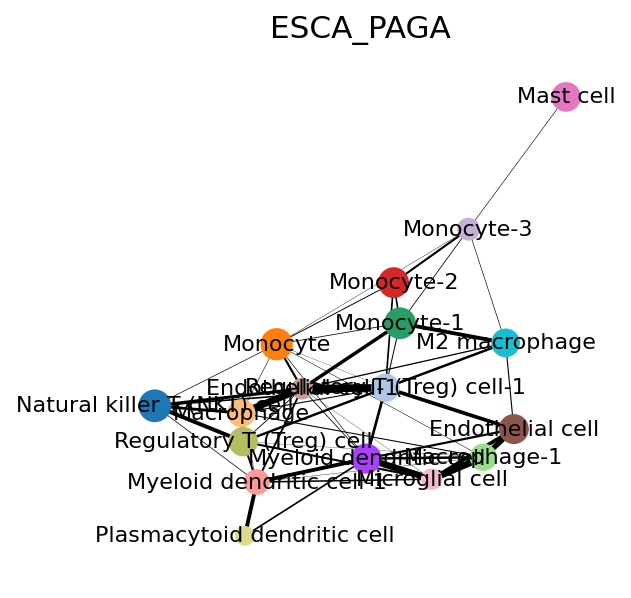

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden_anno')
sc.pl.paga(adata, threshold=0.03,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43,save='esca_trajectery.png',title='ESCA_PAGA')

running PAGA
    finished (0:00:00)


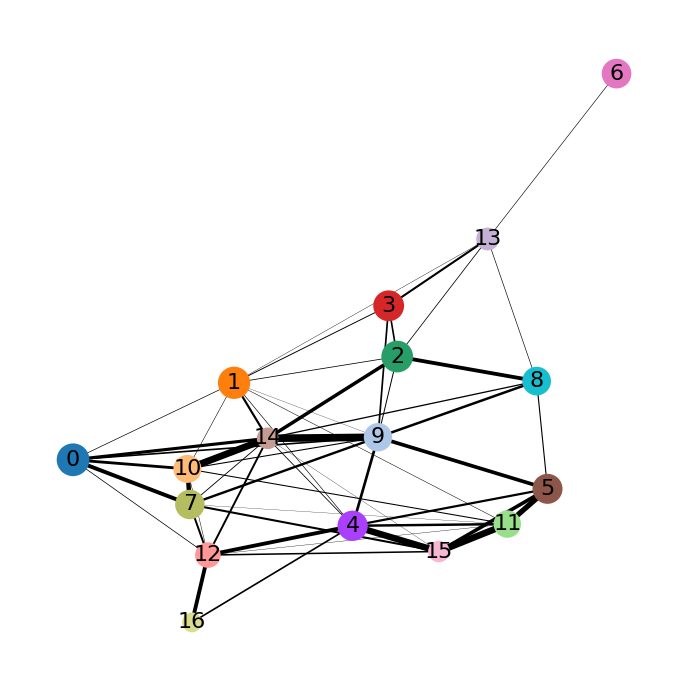

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, threshold=0.03, show=False,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=43)

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == 'Endothelial cell')[0]
sc.tl.dpt(adata,)

drawing single-cell graph using layout 'fa'
    finished (0:01:07)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


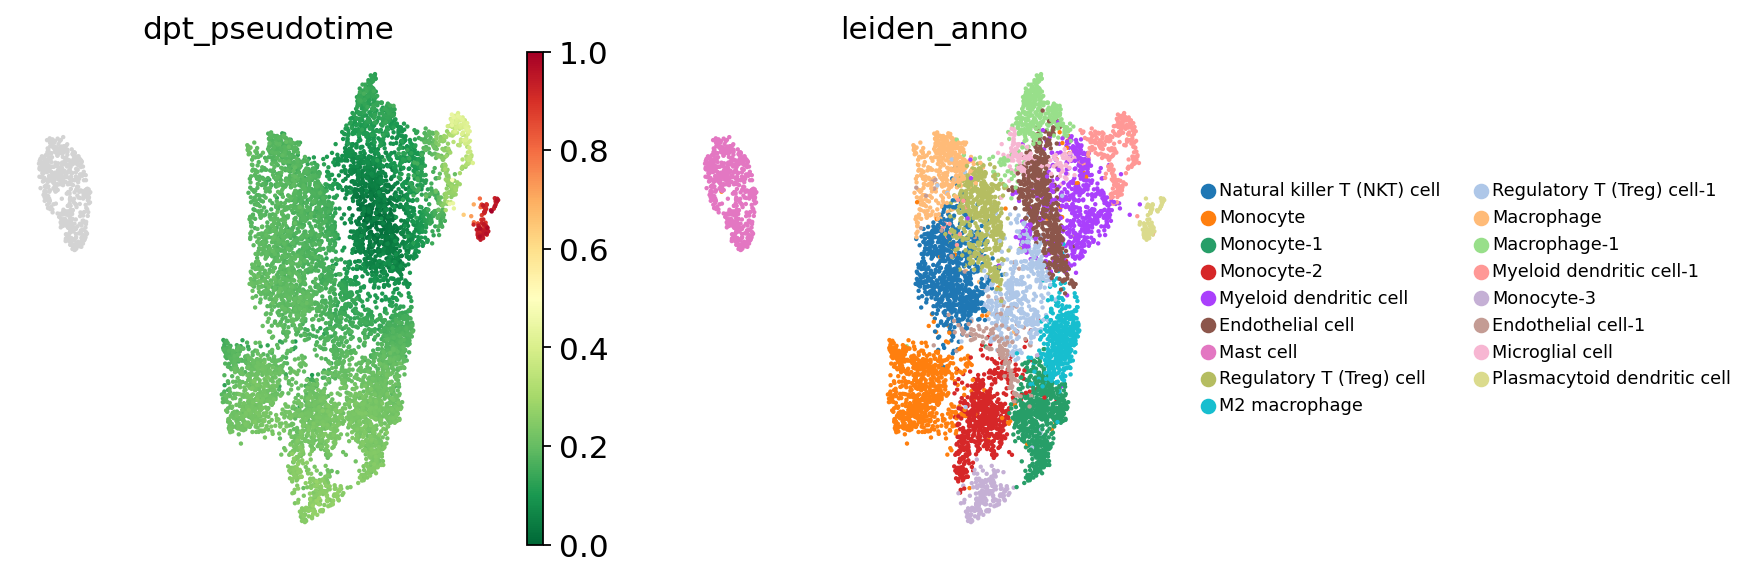

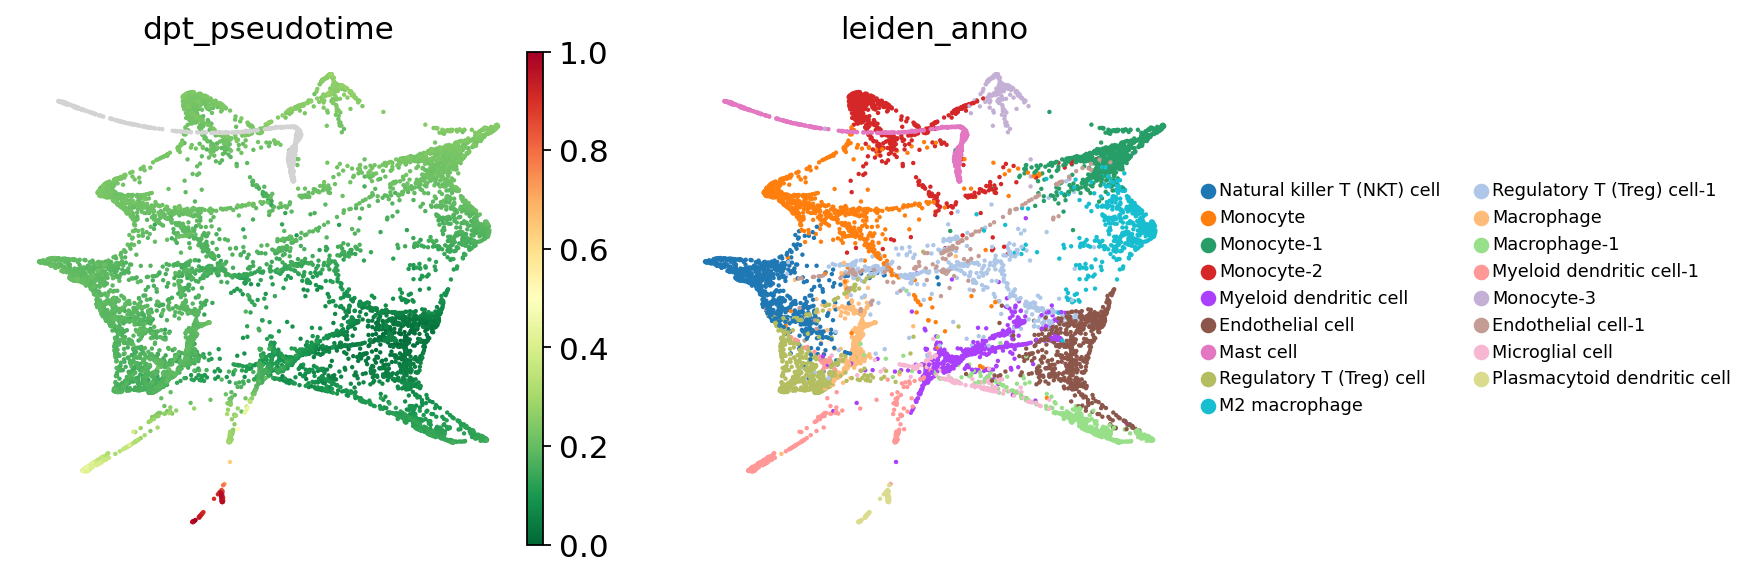

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.pl.umap(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='esca_umap.png')
sc.pl.draw_graph(adata, color=['dpt_pseudotime','leiden_anno',],palette=sc.pl.palettes.vega_20_scanpy,wspace=0.2,legend_fontsize=8,add_outline=False,frameon=False,save='esca_dpt.png')

In [ ]:
import json
path={
      'Monocyte':[5,9,1,2,3,13],
      'Dendritic cell':[5,4,12],
      'Microglial cell':[5,15],
      'Macrophage':[5,11,10],
}
with open("/content/drive/MyDrive/SL/data/dpt/esca_dpt_json.json","w") as f:
  json.dump(path,f)

In [ ]:
newdata=anndata.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, dtype='float32')
newdata.write("/content/drive/MyDrive/SL/data/dpt/esca_dpt.h5ad", compression="gzip")

In [ ]:
!zip -r figures1.zip figures

  adding: figures/ (stored 0%)
  adding: figures/draw_graph_falym_dpt.png (deflated 7%)
  adding: figures/draw_graph_facdc2_dpt.png (deflated 2%)
  adding: figures/umap_ov-ftc_umap.png (deflated 1%)
  adding: figures/umap_mye_umap.png (deflated 3%)
  adding: figures/draw_graph_fa_ov-ftc_dpt.png (deflated 4%)
  adding: figures/pagamye_trajectery.png (deflated 8%)
  adding: figures/pagacdc2_trajectery.png (deflated 9%)
  adding: figures/paga_ov-ftc_trajectery.png (deflated 10%)
  adding: figures/pagaesca_trajectery.png (deflated 9%)
  adding: figures/umapesca_umap.png (deflated 2%)
  adding: figures/draw_graph_faucec_dpt.png (deflated 3%)
  adding: figures/umappaad_umap.png (deflated 3%)
  adding: figures/pagaucec_trajectery.png (deflated 9%)
  adding: figures/pagapaad_trajectery.png (deflated 8%)
  adding: figures/draw_graph_fathca_dpt.png (deflated 4%)
  adding: figures/draw_graph_fa_mye_dpt.png (deflated 4%)
  adding: figures/draw_graph_fapaad_dpt.png (deflated 5%)
  adding: figures/u

# 

# KIDNEY

In [ ]:
import anndata
adata=anndata.read_h5ad("/content/Pan-Cancer/KIDNEY.h5ad")
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=20, n_pcs=40)
sc.tl.leiden(adata)
max(set(adata.obs.leiden))

extracting highly variable genes
    finished (0:00:10)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:08)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished (0:00:31)
running Leiden clustering
    finished (0:00:08)


'9'

In [ ]:
len(list(set(adata.obs.leiden)))

20

In [ ]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
dat = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'logfoldchanges','scores','pvals']})
dat.to_csv("kidney_rank.csv")


ranking genes
    finished (0:01:28)


In [ ]:
dat.to_csv("/content/drive/MyDrive/SL/data/kidney_rank.csv")

In [ ]:
%%bash
python '/content/SCSA/SCSA.py' -d '/content/SCSA/whole.db' -i kidney_rank.csv -s scanpy -E -f 1.5 -p 0.01 -o '/content/kidney_result.txt' -m txt 

Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
Namespace(Gensymbol=True, MarkerDB=None, celltype='normal', cluster='all', db='/content/SCSA/whole.db', foldchange=1.5, input='kidney_rank.csv', list_tissue=False, noprint=False, norefdb=False, outfmt='txt', output='/content/kidney_result.txt', pvalue=0.01, source='scanpy', species='Human', target='cellmarker', tissue='All', weight=100.0)
Version V1.1 [2020/07/03]
DB load: 47347 3 3 48257 37440
load markers: 45409
############################## Cluster 0 ##############################

Cell Num: 123
Gene Num: 110
Not Zero: 441
Cluster 0 Gene number: 147
------------------------------------------------------------
Type                Cell Type           Score     Times
------------------------------------------------------------
?                     B cell            5.8254    1.7  
------------------------------------------------------------
               (Endothelial cell)      (3.4798)
----------------------------------------

In [ ]:
cmdt=pd.read_csv('kidney_result.txt',sep='\t')

In [ ]:
def cmn(a):
    return cmdt.loc[cmdt['Cluster']==a].head(1).values
#读出每种celltype的首位

r=0
for i in range(0,len(list(set(adata.obs.leiden)))):
  #根据实际cluster种类进行读取范围界定  
  print(cmn(r)) 
  r=r+1

[['B cell' 5.825398641145482 0]]
[['Monocyte' 6.166724617807156 1]]
[['Monocyte' 6.575141648644467 2]]
[['Monocyte' 6.705126484611529 3]]
[['Monocyte' 5.8027675783745005 4]]
[['Monocyte' 4.757063006518065 5]]
[['Myeloid dendritic cell' 7.173681046537348 6]]
[['Microglial cell' 7.028180079716472 7]]
[['Myeloid dendritic cell' 6.4340384342001125 8]]
[['Hematopoietic stem cell' 6.55291073175169 9]]
[['Macrophage' 6.607824023983882 10]]
[['Microglial cell' 6.532868050057873 11]]
[['B cell' 7.365951178039858 12]]
[['Osteocyte' 5.652377830559487 13]]
[['Monocyte' 6.426965383623889 14]]
[['Macrophage' 6.06007542666476 15]]
[['Mast cell' 7.307726901111574 16]]
[['Myeloid dendritic cell' 6.262922618493245 17]]
[['Mast cell' 7.55844305779573 18]]
[['Plasmacytoid dendritic cell' 10.83672518765258 19]]


In [ ]:
celltype=[cmn(i)[0][0] for i in range(len(list(set(adata.obs.leiden))))]
#celltype[15]='Mesenchymal stem cell'

In [ ]:
celltype=celltype[:]
ty=list(set(celltype))
k=pd.DataFrame(index=ty)
for i in range(len(celltype)):
  test=cmdt.loc[cmdt['Cluster']==i]
  test=test.set_index(test.columns[0])
  ty1=list(set(ty).intersection(test.index.tolist()))
  k[str(i)]=test.loc[ty1]['Z-score']
k.fillna(0, inplace=True)
k.head()

0         1         2  ...        17        18        19
Microglial cell  2.534858  0.315812  2.081835  ... -0.026129  0.315687  0.588817
Macrophage       0.724069  3.325902  2.987409  ...  0.449947 -0.398172 -0.256535
B cell           5.825399  1.282452  3.125225  ...  5.253782  1.280213  2.334102
Monocyte         1.432237  6.166725  6.575142  ... -0.015171  0.266193  0.324966
Osteocyte       -0.530958  0.000000  0.000000  ...  0.000000  0.000000 -0.287058

[5 rows x 20 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:1214: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


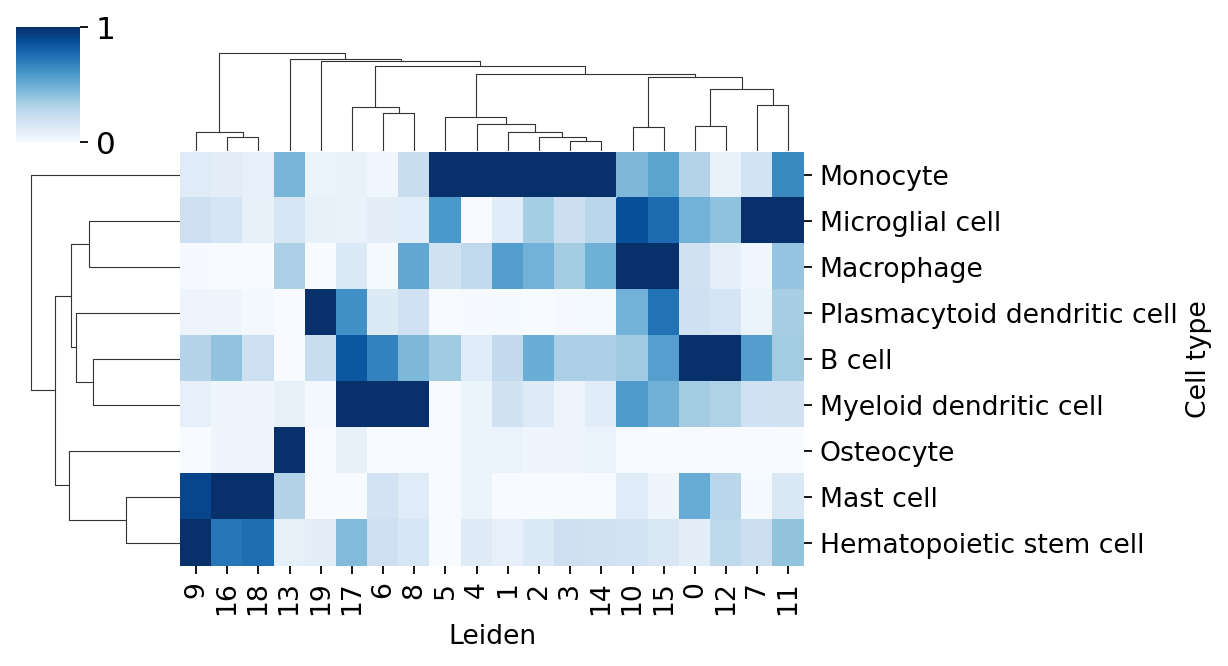

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
new_blues=sns.color_palette("Oranges", 1000)[0:700]
a = sns.clustermap(k,standard_scale=1,cmap =new_blues,figsize=(8,4),square=True)
#设置聚类热图的横纵坐标标签大小
a.ax_heatmap.yaxis.set_tick_params(labelsize=12)
a.ax_heatmap.xaxis.set_tick_params(labelsize=12)
# option 1
#a.ax_heatmap.set(xlabel='Leiden',ylabel='Cell type',font={'size':12})
a.ax_heatmap.set_xlabel("Leiden", fontsize = 12)
a.ax_heatmap.set_ylabel("Cell type", fontsize = 12)
#a.ax_heatmap.set_title("Plot", fontsize = 20)
plt.savefig("fig_cell_type_kidney.png",dpi=300,bbox_inches = 'tight')

In [ ]:
t={}
new_type=[]
for i in celltype:
  if i in t.keys():
    new_type.append(i+'-'+str(t[i]))
    t[i]+=1
  else:
    new_type.append(i)
    t[i]=1
new_type

['B cell',
 'Monocyte',
 'Monocyte-1',
 'Monocyte-2',
 'Monocyte-3',
 'Monocyte-4',
 'Myeloid dendritic cell',
 'Microglial cell',
 'Myeloid dendritic cell-1',
 'Hematopoietic stem cell',
 'Macrophage',
 'Microglial cell-1',
 'B cell-1',
 'Osteocyte',
 'Monocyte-5',
 'Macrophage-1',
 'Mast cell',
 'Myeloid dendritic cell-2',
 'Mast cell-1',
 'Plasmacytoid dendritic cell']

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:13)
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:11)
computing UMAP
    finished (0:00:56)


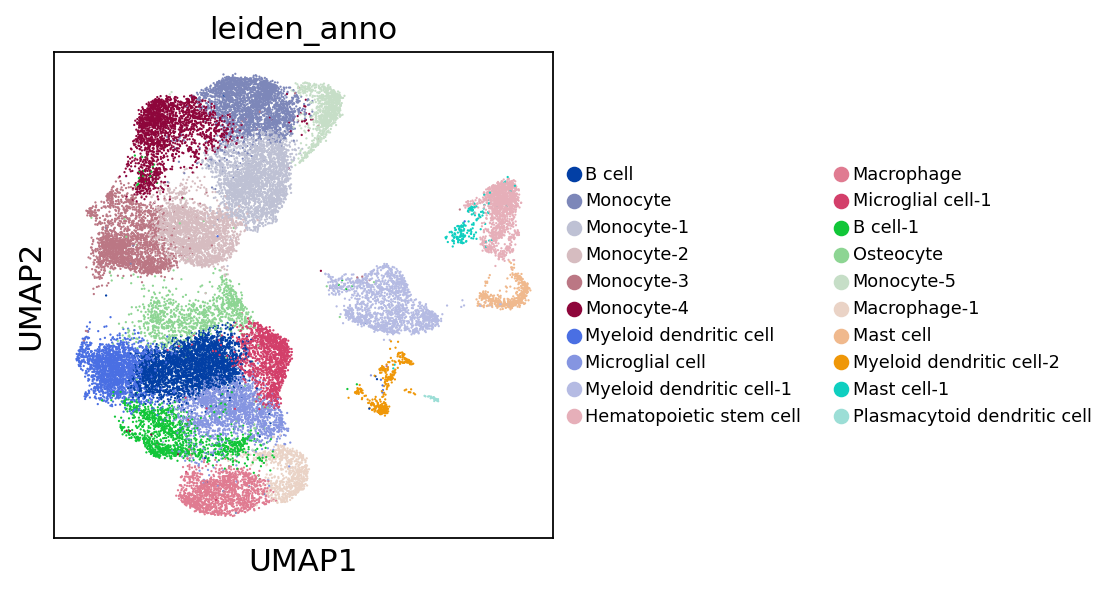

In [ ]:
sc.pp.pca(adata)
sc.pp.neighbors(adata,metric="cosine")
sc.tl.umap(adata,random_state=41822099)
adata.obs['leiden_anno'] = adata.obs['leiden']
adata.obs['leiden_anno'].cat.categories = new_type
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')

In [ ]:
sc.pl.umap(adata, color=['leiden_anno',],palette=sc.pl.palettes.zeileis_28,wspace=0.5,legend_fontsize=8,)

In [ ]:
sc.tl.diffmap(adata)
sc.pp.neighbors(adata, n_neighbors=20, use_rep='X_diffmap')
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden_anno')

computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9983673  0.99580723 0.9923737  0.9902906  0.9879826
     0.98738086 0.9847893  0.98247415 0.97485185 0.9741485  0.97157514
     0.9692708  0.9665693  0.963481  ]
    finished (0:00:01)
computing neighbors
    finished (0:00:04)
running PAGA
    finished (0:00:01)


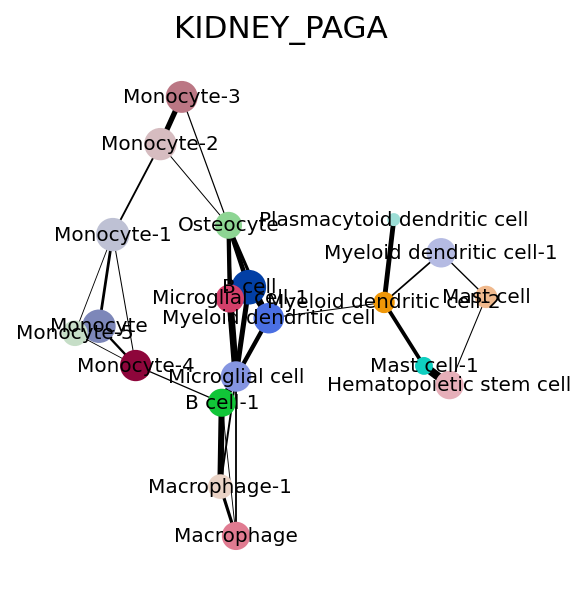

In [ ]:
sc.pl.paga(adata, threshold=0.1,fontsize=9,
      fontweight='normal',frameon=False,
      edge_width_scale=0.5,random_state=53,
      save='kidney_trajectery.png',title='KIDNEY_PAGA')

running PAGA
    finished (0:00:02)


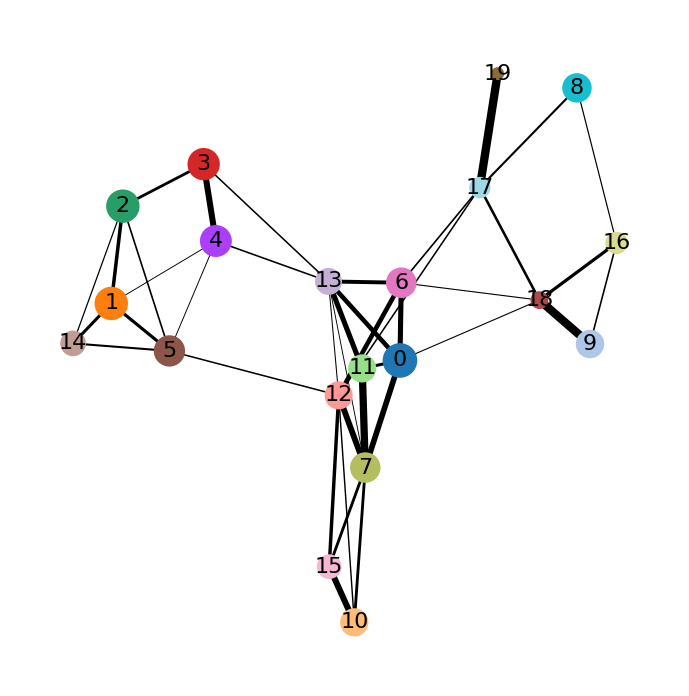

In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[5,5],color_map='RdYlGn_r')
sc.tl.paga(adata, groups='leiden')
sc.pl.paga(adata, threshold=0.1, show=False,fontsize=10,fontweight='normal',frameon=False,edge_width_scale=0.5,random_state=53)

In [ ]:
sc.tl.draw_graph(adata, init_pos='paga')
adata.uns['iroot'] = np.flatnonzero(adata.obs['leiden_anno']  == 'Hematopoietic stem cell')[0]
sc.tl.dpt(adata,)

drawing single-cell graph using layout 'fa'
    finished (0:06:01)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


In [ ]:
sc.set_figure_params(dpi=80,dpi_save=300,figsize=[4,4],color_map='viridis')
sc.pl.umap(adata, color=['dpt_pseudotime','leiden_anno',],
           palette=sc.pl.palettes.zeileis_28,
           wspace=0.2,legend_fontsize=8,add_outline=False,
           frameon=False,save='kidney_umap.png',title=['KIDNEY_pseudotime','Cell_type'])
sc.pl.draw_graph(adata, color=['dpt_pseudotime','leiden_anno',],
          palette=sc.pl.palettes.zeileis_28,
          wspace=0.2,legend_fontsize=8,
          add_outline=False,frameon=False
          ,save='kidney_dpt.png',title=['KIDNEY_pseudotime','Cell_type'])

In [ ]:
paths = [('Mast cells', [9, 18,16]),
      ('Dendritic cell', [9,18,17,8,6]),
      ('Monocyte', [9,18,17,4,3,2,1,5,14]),
      ('Macrophage',[9,18,17,6,0,7,10,15])]

In [ ]:
import json
path={
      'Dendritic cell':[9,18,17,8,6],
      'Monocyte':[9,18,17,4,3,2,1,5,14],
      'Macrophage':[9,18,17,6,0,7,10,15],
      'Microglial cell':[9,18,17,7,11]
}
with open("/content/drive/MyDrive/SL/data/dpt/KIDNEY_dpt_json.json","w") as f:
  json.dump(path,f)

In [ ]:
newdata=anndata.AnnData(adata.raw.X, obs=adata.obs, var=adata.raw.var, dtype='float32')
newdata.write("/content/drive/MyDrive/SL/data/dpt/KIDNEY_dpt.h5ad", compression="gzip")